In [1]:
from codes.python import metric
import numpy as np
from scipy import signal
import scipy
from numpy import array
import os
import matplotlib.pyplot as plt
import wfdb
from wfdb import processing, plot
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.preprocessing import normalize
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
import pywt
from biosppy.signals import ecg
from sklearn import metrics
from codes.python import ecg_waveform_extractor as waveform
import time as system_time
from scipy import stats
import warnings
import termcolor as colored
from math import*
import pandas as pd
from sklearn.decomposition import PCA, FastICA
from mpl_toolkits.mplot3d import axes3d, Axes3D
from codes.python import post_process_features_ex as post_features
import time
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix 

C:\Users\nimch681\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [97]:
#ls = [0,1,2,3]
ls = []
ls.extend(['N', 'L', 'R'])                    # N
ls.extend(['A', 'a', 'J', 'S', 'e', 'j'])     # SVEB 
ls.extend(['V', 'E'])                         # VEB
ls.extend(['F'])
#ls.extend([ 'P', '/', 'f', 'u'])
patient_l_1 = [101]
patient_l_2 = [100]
#patient_ls_1 = [101,106,108,109,112,114,115,116,118,119,122,124,201,203,205,207,208,209,215,220,223,230]
#patient_ls_2 = [100,103,105,111,113,117,121,123,200,202,210,212,213,214,219,221,222,228,231,232,233,234]

In [6]:
ls

['A', 'a', 'J', 'S', 'e', 'j', 'V', 'E', 'F']

In [7]:
def average(numbers):
    return float(sum(numbers)) / len(numbers)   

In [98]:
DB1_patients = pd.read_csv("DB1_patient_list.csv")
#DB1_patients = DB1_patients.drop([1872])
DB1_patients = DB1_patients[DB1_patients['2'].isin(ls)]
#DB1_patients = DB1_patients[DB1_patients['0'].isin(patient_l_1)]


DB2_patients = pd.read_csv("DB2_patient_list.csv")
#DB2_patients= DB2_patients.drop([18692, 31865])
DB2_patients = DB2_patients[DB2_patients['2'].isin(ls)]
#DB2_patients = DB2_patients[DB2_patients['0'].isin(patient_l_2)]


DB1 = pd.read_csv("DB1.csv")
#DB1 = DB1.drop([1872])
DB1 = DB1[DB1['class_beat'].isin(ls)]
#DB1 = DB1[DB1['patient'].isin(patient_l_1)]


DB2 = pd.read_csv("DB2.csv")
#DB2 = DB2.drop([18692, 31865])
DB2 = DB2[DB2['class_beat'].isin(ls)]
#DB2 = DB2[DB2['patient'].isin(patient_l_2)]


In [84]:
len(DB1)

50987

In [99]:
patients_ls_1 = DB1_patients.iloc[:,0]
patients_ls_2 = DB2_patients.iloc[:,0]

patients_ls_1_ID = DB1_patients.iloc[:,1]
patients_ls_2_ID = DB2_patients.iloc[:,1]

patients_ls_1_type = DB1_patients.iloc[:,2]
patients_ls_2_type = DB2_patients.iloc[:,2]

#patients_ls_1 = np.asarray(DB1_patients, dtype=int)
patients_ls_1 = [int(i) for i in patients_ls_1]
patients_ls_1 = np.asarray(patients_ls_1, dtype=int)
patients_ls_1 = patients_ls_1.reshape(patients_ls_1.shape[0],1)
#patients_ls_2 = np.asarray(DB2_patients, dtype=int)
patients_ls_2 = [int(i) for i in patients_ls_2]
patients_ls_2 = np.asarray(patients_ls_2, dtype=int)
patients_ls_2 = patients_ls_2.reshape(patients_ls_2.shape[0],1)

patients_ls_all = np.vstack((patients_ls_1,patients_ls_2))

#patients_ls_all = patients_ls_all.reshape(7980,1)

patients_ls_all = [int(i) for i in patients_ls_all]

patients_ls_2 = [int(i) for i in patients_ls_2]
patients_ls_1 = [int(i) for i in patients_ls_1]


In [100]:
DB1_amp = pd.read_csv("DB1_amp_time.csv")
DB1_amp = DB1_amp.drop([1872])
#DB1_amp = DB1_amp[DB1_amp['patient'].isin(patient_l_1)]
#DB1_amp = DB1_amp[DB1_amp['col1081'].isin(ls)]



DB2_amp = pd.read_csv("DB2_amp_time.csv")
DB2_amp = DB2_amp.drop([18692, 31865])
#DB2_amp = DB2_amp[DB2_amp['patient'].isin(patient_l_2)]
#DB2_amp = DB2_amp[DB2_amp['col1081'].isin(ls)]



In [101]:
DB1_non_cli = pd.read_csv("DB1_non_clinic.csv")
#DB1_non_cli = DB1_non_cli.drop([1872])
#DB1_non_cli = DB1_non_cli[DB1_non_cli['patient'].isin(patient_l_1)]


DB1_non_cli = DB1_non_cli[DB1_non_cli['y0'].isin(ls)]


DB2_non_cli = pd.read_csv("DB2_non_clinic.csv")
#DB2_non_cli= DB2_non_cli.drop([18692, 31865])
DB2_non_cli = DB2_non_cli[DB2_non_cli['y0'].isin(ls)]
#DB2_non_cli = DB2_non_cli[DB2_non_cli['patient'].isin(patient_l_2)]



In [102]:

DB1_V1 = pd.read_csv("DB1_V1.csv")
#DB1_V1 = DB1_V1.drop([1872])
DB1_V1 = DB1_V1[DB1_V1['class_beat'].isin(ls)]
#DB1_V1 = DB1_V1[DB1_V1['patient'].isin(patient_l_1)]



DB2_V1 = pd.read_csv("DB2_V1.csv")
#DB2_V1 = DB2_V1.drop([18692, 31865])
DB2_V1 = DB2_V1[DB2_V1['class_beat'].isin(ls)]
#DB2_V1 = DB2_V1[DB2_V1['patient'].isin(patient_l_2)]



In [103]:
ls = []
ls.extend(["['N']","['L']", "['R']"])                    # N
ls.extend(["['A']", "['a']", "['J']", "['S']",  "['e']", "['j']"])     # SVEB 
ls.extend(["['V']", "['E']"])                         # VEB
ls.extend(["['F']"])
#ls.extend([ "['P']","[ '/']"," ['f']", "['u']"])
DB1_dwt = pd.read_csv("DB1_DTW_MLII.csv")
#DB1_dwt = DB1_dwt.drop([1872])
DB1_dwt = DB1_dwt[DB1_dwt['beat_type'].isin(ls)]
#DB1_dwt = DB1_dwt[DB1_dwt['patient'].isin(patient_l_1)]


DB2_dwt = pd.read_csv("DB2_DTW_MLII.csv")
#DB2_dwt = DB2_dwt.drop([18692, 31865])
DB2_dwt = DB2_dwt[DB2_dwt['beat_type'].isin(ls)]
#DB2_dwt = DB2_dwt[DB2_dwt['patient'].isin(patient_l_2)]


DB1_dwt_V1 = pd.read_csv("DB1_DTW_V1.csv")
#DB1_dwt_V1 = DB1_dwt_V1.drop([1872])
DB1_dwt_V1 = DB1_dwt_V1[DB1_dwt_V1['beat_type'].isin(ls)]
#DB1_dwt_V1 = DB1_dwt_V1[DB1_dwt_V1['patient'].isin(patient_l_1)]



DB2_dwt_V1 = pd.read_csv("DB2_DTW_V1.csv")
#DB2_dwt_V1 = DB2_dwt_V1.drop([18692, 31865])
DB2_dwt_V1 = DB2_dwt_V1[DB2_dwt_V1['beat_type'].isin(ls)]
#DB2_dwt_V1 = DB2_dwt_V1[DB2_dwt_V1['patient'].isin(patient_l_2)]




In [82]:
len(DB2_dwt)

49679

In [104]:
 #list(DB1.columns.values)
variables_1 = DB1.iloc[:,0:130]
class_beat_1 = DB1_patients.iloc[:,2]
class_ID_1 = DB1_patients.iloc[:,1]

np_variables_1 = np.asarray(variables_1)
np_class_beat_1 = np.asarray(class_beat_1)
np_class_ID_1 = np.asarray(class_ID_1)

np_class_beat_1 = np_class_beat_1.reshape(np_class_beat_1.shape[0],1)
np_class_ID_1 = np_class_ID_1.reshape(np_class_ID_1.shape[0],1)

variables_2 = DB2.iloc[:,0:130]
class_beat_2 = DB2_patients.iloc[:,2]
class_ID_2 = DB2_patients.iloc[:,1]

np_variables_2 = np.asarray(variables_2)
np_class_beat_2 = np.asarray(class_beat_2)
np_class_ID_2 = np.asarray(class_ID_2)

np_class_beat_2 = np_class_beat_2.reshape(np_class_beat_2.shape[0],1)
np_class_ID_2 = np_class_ID_2.reshape(np_class_ID_2.shape[0],1)

DB_var_all = np.vstack((np_variables_1,np_variables_2))
DB_class_all = np.vstack((np_class_ID_1,np_class_ID_2))
DB_type_all = np.vstack((np_class_beat_1,np_class_beat_2))

np_class_beat_1 = [str(i) for i in np_class_beat_1]
np_class_ID_1 = [int(i) for i in np_class_ID_1]

np_class_beat_1 = np.asarray(np_class_beat_1)
np_class_ID_1 = np.asarray(np_class_ID_1)


np_class_beat_2 = [str(i) for i in np_class_beat_2]
np_class_ID_2 = [int(i) for i in np_class_ID_2]

np_class_beat_2 = np.asarray(np_class_beat_2)
np_class_ID_2 = np.asarray(np_class_ID_2)

DB_type_all = [str(i) for i in DB_type_all]
DB_class_all = [int(i) for i in DB_class_all]

DB_type_all = np.asarray(DB_type_all)
DB_class_all = np.asarray(DB_class_all)

In [10]:
len(DB_var_all)

103626

52486

In [80]:


#DB1_dwt_V1.to_csv("DB1_DTW_V1.csv", index=False)
#DB2_dwt_V1.to_csv("DB1_DTW_V1.csv", index=False)

In [105]:
np_non_1 = np.asarray(DB1_non_cli)
np_non_2 = np.asarray(DB2_non_cli)

np_non_var_1 = np.asarray(DB1_non_cli.iloc[:,0:140])



np_non_var_2 = np.asarray(DB2_non_cli.iloc[:,0:140])

DB_var_non_all = np.vstack((np_non_var_1,np_non_var_2))


In [18]:
np_non_var_1[:,0:41]

array([[-7.42018204e-02, -7.33267802e-02, -5.55757835e-02, ...,
         1.86210070e-02, -8.01880510e-02, -9.28122130e-02],
       [-8.61840067e-02, -8.96809491e-02, -6.34485738e-02, ...,
         1.01796097e-01,  6.19140449e-03, -3.03068721e-02],
       [-2.61498673e-02, -2.77377441e-02,  5.86117325e-03, ...,
         2.08741184e-01,  7.01989923e-02,  8.40493372e-03],
       ...,
       [ 8.27181154e-01,  1.19559170e+00,  1.43506639e+00, ...,
        -2.66020998e-01,  2.84870673e-02,  2.58340322e-01],
       [ 3.72534797e-02,  4.08363845e-01,  6.79730007e-01, ...,
        -8.07863973e-03,  1.96997094e-02,  2.89469473e-04],
       [ 4.99982400e-01,  8.73088291e-01,  1.00991399e+00, ...,
        -3.71968488e-01, -3.90051088e-01, -4.04059109e-01]])

In [106]:
dis_1 = DB1_dwt.iloc[:,0]


dis_2 = DB2_dwt.iloc[:,0]

dis_1_V1 = DB1_dwt_V1.iloc[:,0]


dis_2_V1 = DB2_dwt_V1.iloc[:,0]

dtw_1 = np.asarray(dis_1)
dtw_1 = dtw_1.reshape(dtw_1.shape[0],1)

dtw_2 = np.asarray(dis_2)
dtw_2 = dtw_2.reshape(dtw_2.shape[0],1)

dtw_1_V1 = np.asarray(dis_1_V1)
dtw_1_V1 = dtw_1_V1.reshape(dtw_1_V1.shape[0],1)


dtw_2_V1 = np.asarray(dis_2_V1)
dtw_2_V1 = dtw_2_V1.reshape(dtw_2_V1.shape[0],1)


In [13]:
ampt_time_1 = DB1_amp.iloc[:,0:1082-2]


ampt_time_2 = DB2_amp.iloc[:,0:1082-2]

np_amp_1 = np.asarray(ampt_time_1)
np_amp_2 = np.asarray(ampt_time_2)

In [107]:
v1_1 = DB1_V1.iloc[:,0:130]

np_V1_1 = np.asarray(v1_1)


v1_2 = DB2_V1.iloc[:,0:130]

np_V1_2 = np.asarray(v1_2)

DB_v_var_all = np.vstack((np_V1_1,np_V1_2))



In [149]:
#norm_var_1_MLII = post_features.normalised_values_multiples(np_variables_1)
#norm_var_2_MLII = post_features.normalised_values_multiples(np_variables_2)

#norm_var_1_V1 = post_features.normalised_values_multiples(np_V1_1)
#norm_var_2_V2 = post_features.normalised_values_multiples(np_V1_2)





done norm
row 0 done
done norm
row 1 done
done norm
row 2 done
done norm
row 3 done
done norm
row 4 done
done norm
row 5 done
done norm
row 6 done
done norm
row 7 done
done norm
row 8 done
done norm
row 9 done
done norm
row 10 done
done norm
row 11 done
done norm
row 12 done
done norm
row 13 done
done norm
row 14 done
done norm
row 15 done
done norm
row 16 done
done norm
row 17 done
done norm
row 18 done
done norm
row 19 done
done norm
row 20 done
done norm
row 21 done
done norm
row 22 done
done norm
row 23 done
done norm
row 24 done
done norm
row 25 done
done norm
row 26 done
done norm
row 27 done
done norm
row 28 done
done norm
row 29 done
done norm
row 30 done
done norm
row 31 done
done norm
row 32 done
done norm
row 33 done
done norm
row 34 done
done norm
row 35 done
done norm
row 36 done
done norm
row 37 done
done norm
row 38 done
done norm
row 39 done
done norm
row 40 done
done norm
row 41 done
done norm
row 42 done
done norm
row 43 done
done norm
row 44 done
done norm
row 45 don

done norm
row 823 done
done norm
row 824 done
done norm
row 825 done
done norm
row 826 done
done norm
row 827 done
done norm
row 828 done
done norm
row 829 done
done norm
row 830 done
done norm
row 831 done
done norm
row 832 done
done norm
row 833 done
done norm
row 834 done
done norm
row 835 done
done norm
row 836 done
done norm
row 837 done
done norm
row 838 done
done norm
row 839 done
done norm
row 840 done
done norm
row 841 done
done norm
row 842 done
done norm
row 843 done
done norm
row 844 done
done norm
row 845 done
done norm
row 846 done
done norm
row 847 done
done norm
row 848 done
done norm
row 849 done
done norm
row 850 done
done norm
row 851 done
done norm
row 852 done
done norm
row 853 done
done norm
row 854 done
done norm
row 855 done
done norm
row 856 done
done norm
row 857 done
done norm
row 858 done
done norm
row 859 done
done norm
row 860 done
done norm
row 861 done
done norm
row 862 done
done norm
row 863 done
done norm
row 864 done
done norm
row 865 done
done norm
r

row 1572 done
done norm
row 1573 done
done norm
row 1574 done
done norm
row 1575 done
done norm
row 1576 done
done norm
row 1577 done
done norm
row 1578 done
done norm
row 1579 done
done norm
row 1580 done
done norm
row 1581 done
done norm
row 1582 done
done norm
row 1583 done
done norm
row 1584 done
done norm
row 1585 done
done norm
row 1586 done
done norm
row 1587 done
done norm
row 1588 done
done norm
row 1589 done
done norm
row 1590 done
done norm
row 1591 done
done norm
row 1592 done
done norm
row 1593 done
done norm
row 1594 done
done norm
row 1595 done
done norm
row 1596 done
done norm
row 1597 done
done norm
row 1598 done
done norm
row 1599 done
done norm
row 1600 done
done norm
row 1601 done
done norm
row 1602 done
done norm
row 1603 done
done norm
row 1604 done
done norm
row 1605 done
done norm
row 1606 done
done norm
row 1607 done
done norm
row 1608 done
done norm
row 1609 done
done norm
row 1610 done
done norm
row 1611 done
done norm
row 1612 done
done norm
row 1613 done
do

done norm
row 2416 done
done norm
row 2417 done
done norm
row 2418 done
done norm
row 2419 done
done norm
row 2420 done
done norm
row 2421 done
done norm
row 2422 done
done norm
row 2423 done
done norm
row 2424 done
done norm
row 2425 done
done norm
row 2426 done
done norm
row 2427 done
done norm
row 2428 done
done norm
row 2429 done
done norm
row 2430 done
done norm
row 2431 done
done norm
row 2432 done
done norm
row 2433 done
done norm
row 2434 done
done norm
row 2435 done
done norm
row 2436 done
done norm
row 2437 done
done norm
row 2438 done
done norm
row 2439 done
done norm
row 2440 done
done norm
row 2441 done
done norm
row 2442 done
done norm
row 2443 done
done norm
row 2444 done
done norm
row 2445 done
done norm
row 2446 done
done norm
row 2447 done
done norm
row 2448 done
done norm
row 2449 done
done norm
row 2450 done
done norm
row 2451 done
done norm
row 2452 done
done norm
row 2453 done
done norm
row 2454 done
done norm
row 2455 done
done norm
row 2456 done
done norm
row 24

row 3310 done
done norm
row 3311 done
done norm
row 3312 done
done norm
row 3313 done
done norm
row 3314 done
done norm
row 3315 done
done norm
row 3316 done
done norm
row 3317 done
done norm
row 3318 done
done norm
row 3319 done
done norm
row 3320 done
done norm
row 3321 done
done norm
row 3322 done
done norm
row 3323 done
done norm
row 3324 done
done norm
row 3325 done
done norm
row 3326 done
done norm
row 3327 done
done norm
row 3328 done
done norm
row 3329 done
done norm
row 3330 done
done norm
row 3331 done
done norm
row 3332 done
done norm
row 3333 done
done norm
row 3334 done
done norm
row 3335 done
done norm
row 3336 done
done norm
row 3337 done
done norm
row 3338 done
done norm
row 3339 done
done norm
row 3340 done
done norm
row 3341 done
done norm
row 3342 done
done norm
row 3343 done
done norm
row 3344 done
done norm
row 3345 done
done norm
row 3346 done
done norm
row 3347 done
done norm
row 3348 done
done norm
row 3349 done
done norm
row 3350 done
done norm
row 3351 done
do

done norm
row 4228 done
done norm
row 4229 done
done norm
row 4230 done
done norm
row 4231 done
done norm
row 4232 done
done norm
row 4233 done
done norm
row 4234 done
done norm
row 4235 done
done norm
row 4236 done
done norm
row 4237 done
done norm
row 4238 done
done norm
row 4239 done
done norm
row 4240 done
done norm
row 4241 done
done norm
row 4242 done
done norm
row 4243 done
done norm
row 4244 done
done norm
row 4245 done
done norm
row 4246 done
done norm
row 4247 done
done norm
row 4248 done
done norm
row 4249 done
done norm
row 4250 done
done norm
row 4251 done
done norm
row 4252 done
done norm
row 4253 done
done norm
row 4254 done
done norm
row 4255 done
done norm
row 4256 done
done norm
row 4257 done
done norm
row 4258 done
done norm
row 4259 done
done norm
row 4260 done
done norm
row 4261 done
done norm
row 4262 done
done norm
row 4263 done
done norm
row 4264 done
done norm
row 4265 done
done norm
row 4266 done
done norm
row 4267 done
done norm
row 4268 done
done norm
row 42

row 4821 done
done norm
row 4822 done
done norm
row 4823 done
done norm
row 4824 done
done norm
row 4825 done
done norm
row 4826 done
done norm
row 4827 done
done norm
row 4828 done
done norm
row 4829 done
done norm
row 4830 done
done norm
row 4831 done
done norm
row 4832 done
done norm
row 4833 done
done norm
row 4834 done
done norm
row 4835 done
done norm
row 4836 done
done norm
row 4837 done
done norm
row 4838 done
done norm
row 4839 done
done norm
row 4840 done
done norm
row 4841 done
done norm
row 4842 done
done norm
row 4843 done
done norm
row 4844 done
done norm
row 4845 done
done norm
row 4846 done
done norm
row 4847 done
done norm
row 4848 done
done norm
row 4849 done
done norm
row 4850 done
done norm
row 4851 done
done norm
row 4852 done
done norm
row 4853 done
done norm
row 4854 done
done norm
row 4855 done
done norm
row 4856 done
done norm
row 4857 done
done norm
row 4858 done
done norm
row 4859 done
done norm
row 4860 done
done norm
row 4861 done
done norm
row 4862 done
do

row 5821 done
done norm
row 5822 done
done norm
row 5823 done
done norm
row 5824 done
done norm
row 5825 done
done norm
row 5826 done
done norm
row 5827 done
done norm
row 5828 done
done norm
row 5829 done
done norm
row 5830 done
done norm
row 5831 done
done norm
row 5832 done
done norm
row 5833 done
done norm
row 5834 done
done norm
row 5835 done
done norm
row 5836 done
done norm
row 5837 done
done norm
row 5838 done
done norm
row 5839 done
done norm
row 5840 done
done norm
row 5841 done
done norm
row 5842 done
done norm
row 5843 done
done norm
row 5844 done
done norm
row 5845 done
done norm
row 5846 done
done norm
row 5847 done
done norm
row 5848 done
done norm
row 5849 done
done norm
row 5850 done
done norm
row 5851 done
done norm
row 5852 done
done norm
row 5853 done
done norm
row 5854 done
done norm
row 5855 done
done norm
row 5856 done
done norm
row 5857 done
done norm
row 5858 done
done norm
row 5859 done
done norm
row 5860 done
done norm
row 5861 done
done norm
row 5862 done
do

done norm
row 6821 done
done norm
row 6822 done
done norm
row 6823 done
done norm
row 6824 done
done norm
row 6825 done
done norm
row 6826 done
done norm
row 6827 done
done norm
row 6828 done
done norm
row 6829 done
done norm
row 6830 done
done norm
row 6831 done
done norm
row 6832 done
done norm
row 6833 done
done norm
row 6834 done
done norm
row 6835 done
done norm
row 6836 done
done norm
row 6837 done
done norm
row 6838 done
done norm
row 6839 done
done norm
row 6840 done
done norm
row 6841 done
done norm
row 6842 done
done norm
row 6843 done
done norm
row 6844 done
done norm
row 6845 done
done norm
row 6846 done
done norm
row 6847 done
done norm
row 6848 done
done norm
row 6849 done
done norm
row 6850 done
done norm
row 6851 done
done norm
row 6852 done
done norm
row 6853 done
done norm
row 6854 done
done norm
row 6855 done
done norm
row 6856 done
done norm
row 6857 done
done norm
row 6858 done
done norm
row 6859 done
done norm
row 6860 done
done norm
row 6861 done
done norm
row 68

done norm
row 7821 done
done norm
row 7822 done
done norm
row 7823 done
done norm
row 7824 done
done norm
row 7825 done
done norm
row 7826 done
done norm
row 7827 done
done norm
row 7828 done
done norm
row 7829 done
done norm
row 7830 done
done norm
row 7831 done
done norm
row 7832 done
done norm
row 7833 done
done norm
row 7834 done
done norm
row 7835 done
done norm
row 7836 done
done norm
row 7837 done
done norm
row 7838 done
done norm
row 7839 done
done norm
row 7840 done
done norm
row 7841 done
done norm
row 7842 done
done norm
row 7843 done
done norm
row 7844 done
done norm
row 7845 done
done norm
row 7846 done
done norm
row 7847 done
done norm
row 7848 done
done norm
row 7849 done
done norm
row 7850 done
done norm
row 7851 done
done norm
row 7852 done
done norm
row 7853 done
done norm
row 7854 done
done norm
row 7855 done
done norm
row 7856 done
done norm
row 7857 done
done norm
row 7858 done
done norm
row 7859 done
done norm
row 7860 done
done norm
row 7861 done
done norm
row 78

row 8820 done
done norm
row 8821 done
done norm
row 8822 done
done norm
row 8823 done
done norm
row 8824 done
done norm
row 8825 done
done norm
row 8826 done
done norm
row 8827 done
done norm
row 8828 done
done norm
row 8829 done
done norm
row 8830 done
done norm
row 8831 done
done norm
row 8832 done
done norm
row 8833 done
done norm
row 8834 done
done norm
row 8835 done
done norm
row 8836 done
done norm
row 8837 done
done norm
row 8838 done
done norm
row 8839 done
done norm
row 8840 done
done norm
row 8841 done
done norm
row 8842 done
done norm
row 8843 done
done norm
row 8844 done
done norm
row 8845 done
done norm
row 8846 done
done norm
row 8847 done
done norm
row 8848 done
done norm
row 8849 done
done norm
row 8850 done
done norm
row 8851 done
done norm
row 8852 done
done norm
row 8853 done
done norm
row 8854 done
done norm
row 8855 done
done norm
row 8856 done
done norm
row 8857 done
done norm
row 8858 done
done norm
row 8859 done
done norm
row 8860 done
done norm
row 8861 done
do

row 9570 done
done norm
row 9571 done
done norm
row 9572 done
done norm
row 9573 done
done norm
row 9574 done
done norm
row 9575 done
done norm
row 9576 done
done norm
row 9577 done
done norm
row 9578 done
done norm
row 9579 done
done norm
row 9580 done
done norm
row 9581 done
done norm
row 9582 done
done norm
row 9583 done
done norm
row 9584 done
done norm
row 9585 done
done norm
row 9586 done
done norm
row 9587 done
done norm
row 9588 done
done norm
row 9589 done
done norm
row 9590 done
done norm
row 9591 done
done norm
row 9592 done
done norm
row 9593 done
done norm
row 9594 done
done norm
row 9595 done
done norm
row 9596 done
done norm
row 9597 done
done norm
row 9598 done
done norm
row 9599 done
done norm
row 9600 done
done norm
row 9601 done
done norm
row 9602 done
done norm
row 9603 done
done norm
row 9604 done
done norm
row 9605 done
done norm
row 9606 done
done norm
row 9607 done
done norm
row 9608 done
done norm
row 9609 done
done norm
row 9610 done
done norm
row 9611 done
do

done norm
row 10570 done
done norm
row 10571 done
done norm
row 10572 done
done norm
row 10573 done
done norm
row 10574 done
done norm
row 10575 done
done norm
row 10576 done
done norm
row 10577 done
done norm
row 10578 done
done norm
row 10579 done
done norm
row 10580 done
done norm
row 10581 done
done norm
row 10582 done
done norm
row 10583 done
done norm
row 10584 done
done norm
row 10585 done
done norm
row 10586 done
done norm
row 10587 done
done norm
row 10588 done
done norm
row 10589 done
done norm
row 10590 done
done norm
row 10591 done
done norm
row 10592 done
done norm
row 10593 done
done norm
row 10594 done
done norm
row 10595 done
done norm
row 10596 done
done norm
row 10597 done
done norm
row 10598 done
done norm
row 10599 done
done norm
row 10600 done
done norm
row 10601 done
done norm
row 10602 done
done norm
row 10603 done
done norm
row 10604 done
done norm
row 10605 done
done norm
row 10606 done
done norm
row 10607 done
done norm
row 10608 done
done norm
row 10609 done


done norm
row 11570 done
done norm
row 11571 done
done norm
row 11572 done
done norm
row 11573 done
done norm
row 11574 done
done norm
row 11575 done
done norm
row 11576 done
done norm
row 11577 done
done norm
row 11578 done
done norm
row 11579 done
done norm
row 11580 done
done norm
row 11581 done
done norm
row 11582 done
done norm
row 11583 done
done norm
row 11584 done
done norm
row 11585 done
done norm
row 11586 done
done norm
row 11587 done
done norm
row 11588 done
done norm
row 11589 done
done norm
row 11590 done
done norm
row 11591 done
done norm
row 11592 done
done norm
row 11593 done
done norm
row 11594 done
done norm
row 11595 done
done norm
row 11596 done
done norm
row 11597 done
done norm
row 11598 done
done norm
row 11599 done
done norm
row 11600 done
done norm
row 11601 done
done norm
row 11602 done
done norm
row 11603 done
done norm
row 11604 done
done norm
row 11605 done
done norm
row 11606 done
done norm
row 11607 done
done norm
row 11608 done
done norm
row 11609 done


row 12569 done
done norm
row 12570 done
done norm
row 12571 done
done norm
row 12572 done
done norm
row 12573 done
done norm
row 12574 done
done norm
row 12575 done
done norm
row 12576 done
done norm
row 12577 done
done norm
row 12578 done
done norm
row 12579 done
done norm
row 12580 done
done norm
row 12581 done
done norm
row 12582 done
done norm
row 12583 done
done norm
row 12584 done
done norm
row 12585 done
done norm
row 12586 done
done norm
row 12587 done
done norm
row 12588 done
done norm
row 12589 done
done norm
row 12590 done
done norm
row 12591 done
done norm
row 12592 done
done norm
row 12593 done
done norm
row 12594 done
done norm
row 12595 done
done norm
row 12596 done
done norm
row 12597 done
done norm
row 12598 done
done norm
row 12599 done
done norm
row 12600 done
done norm
row 12601 done
done norm
row 12602 done
done norm
row 12603 done
done norm
row 12604 done
done norm
row 12605 done
done norm
row 12606 done
done norm
row 12607 done
done norm
row 12608 done
done norm


row 13569 done
done norm
row 13570 done
done norm
row 13571 done
done norm
row 13572 done
done norm
row 13573 done
done norm
row 13574 done
done norm
row 13575 done
done norm
row 13576 done
done norm
row 13577 done
done norm
row 13578 done
done norm
row 13579 done
done norm
row 13580 done
done norm
row 13581 done
done norm
row 13582 done
done norm
row 13583 done
done norm
row 13584 done
done norm
row 13585 done
done norm
row 13586 done
done norm
row 13587 done
done norm
row 13588 done
done norm
row 13589 done
done norm
row 13590 done
done norm
row 13591 done
done norm
row 13592 done
done norm
row 13593 done
done norm
row 13594 done
done norm
row 13595 done
done norm
row 13596 done
done norm
row 13597 done
done norm
row 13598 done
done norm
row 13599 done
done norm
row 13600 done
done norm
row 13601 done
done norm
row 13602 done
done norm
row 13603 done
done norm
row 13604 done
done norm
row 13605 done
done norm
row 13606 done
done norm
row 13607 done
done norm
row 13608 done
done norm


done norm
row 14569 done
done norm
row 14570 done
done norm
row 14571 done
done norm
row 14572 done
done norm
row 14573 done
done norm
row 14574 done
done norm
row 14575 done
done norm
row 14576 done
done norm
row 14577 done
done norm
row 14578 done
done norm
row 14579 done
done norm
row 14580 done
done norm
row 14581 done
done norm
row 14582 done
done norm
row 14583 done
done norm
row 14584 done
done norm
row 14585 done
done norm
row 14586 done
done norm
row 14587 done
done norm
row 14588 done
done norm
row 14589 done
done norm
row 14590 done
done norm
row 14591 done
done norm
row 14592 done
done norm
row 14593 done
done norm
row 14594 done
done norm
row 14595 done
done norm
row 14596 done
done norm
row 14597 done
done norm
row 14598 done
done norm
row 14599 done
done norm
row 14600 done
done norm
row 14601 done
done norm
row 14602 done
done norm
row 14603 done
done norm
row 14604 done
done norm
row 14605 done
done norm
row 14606 done
done norm
row 14607 done
done norm
row 14608 done


done norm
row 15569 done
done norm
row 15570 done
done norm
row 15571 done
done norm
row 15572 done
done norm
row 15573 done
done norm
row 15574 done
done norm
row 15575 done
done norm
row 15576 done
done norm
row 15577 done
done norm
row 15578 done
done norm
row 15579 done
done norm
row 15580 done
done norm
row 15581 done
done norm
row 15582 done
done norm
row 15583 done
done norm
row 15584 done
done norm
row 15585 done
done norm
row 15586 done
done norm
row 15587 done
done norm
row 15588 done
done norm
row 15589 done
done norm
row 15590 done
done norm
row 15591 done
done norm
row 15592 done
done norm
row 15593 done
done norm
row 15594 done
done norm
row 15595 done
done norm
row 15596 done
done norm
row 15597 done
done norm
row 15598 done
done norm
row 15599 done
done norm
row 15600 done
done norm
row 15601 done
done norm
row 15602 done
done norm
row 15603 done
done norm
row 15604 done
done norm
row 15605 done
done norm
row 15606 done
done norm
row 15607 done
done norm
row 15608 done


row 16568 done
done norm
row 16569 done
done norm
row 16570 done
done norm
row 16571 done
done norm
row 16572 done
done norm
row 16573 done
done norm
row 16574 done
done norm
row 16575 done
done norm
row 16576 done
done norm
row 16577 done
done norm
row 16578 done
done norm
row 16579 done
done norm
row 16580 done
done norm
row 16581 done
done norm
row 16582 done
done norm
row 16583 done
done norm
row 16584 done
done norm
row 16585 done
done norm
row 16586 done
done norm
row 16587 done
done norm
row 16588 done
done norm
row 16589 done
done norm
row 16590 done
done norm
row 16591 done
done norm
row 16592 done
done norm
row 16593 done
done norm
row 16594 done
done norm
row 16595 done
done norm
row 16596 done
done norm
row 16597 done
done norm
row 16598 done
done norm
row 16599 done
done norm
row 16600 done
done norm
row 16601 done
done norm
row 16602 done
done norm
row 16603 done
done norm
row 16604 done
done norm
row 16605 done
done norm
row 16606 done
done norm
row 16607 done
done norm


row 17568 done
done norm
row 17569 done
done norm
row 17570 done
done norm
row 17571 done
done norm
row 17572 done
done norm
row 17573 done
done norm
row 17574 done
done norm
row 17575 done
done norm
row 17576 done
done norm
row 17577 done
done norm
row 17578 done
done norm
row 17579 done
done norm
row 17580 done
done norm
row 17581 done
done norm
row 17582 done
done norm
row 17583 done
done norm
row 17584 done
done norm
row 17585 done
done norm
row 17586 done
done norm
row 17587 done
done norm
row 17588 done
done norm
row 17589 done
done norm
row 17590 done
done norm
row 17591 done
done norm
row 17592 done
done norm
row 17593 done
done norm
row 17594 done
done norm
row 17595 done
done norm
row 17596 done
done norm
row 17597 done
done norm
row 17598 done
done norm
row 17599 done
done norm
row 17600 done
done norm
row 17601 done
done norm
row 17602 done
done norm
row 17603 done
done norm
row 17604 done
done norm
row 17605 done
done norm
row 17606 done
done norm
row 17607 done
done norm


done norm
row 18318 done
done norm
row 18319 done
done norm
row 18320 done
done norm
row 18321 done
done norm
row 18322 done
done norm
row 18323 done
done norm
row 18324 done
done norm
row 18325 done
done norm
row 18326 done
done norm
row 18327 done
done norm
row 18328 done
done norm
row 18329 done
done norm
row 18330 done
done norm
row 18331 done
done norm
row 18332 done
done norm
row 18333 done
done norm
row 18334 done
done norm
row 18335 done
done norm
row 18336 done
done norm
row 18337 done
done norm
row 18338 done
done norm
row 18339 done
done norm
row 18340 done
done norm
row 18341 done
done norm
row 18342 done
done norm
row 18343 done
done norm
row 18344 done
done norm
row 18345 done
done norm
row 18346 done
done norm
row 18347 done
done norm
row 18348 done
done norm
row 18349 done
done norm
row 18350 done
done norm
row 18351 done
done norm
row 18352 done
done norm
row 18353 done
done norm
row 18354 done
done norm
row 18355 done
done norm
row 18356 done
done norm
row 18357 done


done norm
row 19068 done
done norm
row 19069 done
done norm
row 19070 done
done norm
row 19071 done
done norm
row 19072 done
done norm
row 19073 done
done norm
row 19074 done
done norm
row 19075 done
done norm
row 19076 done
done norm
row 19077 done
done norm
row 19078 done
done norm
row 19079 done
done norm
row 19080 done
done norm
row 19081 done
done norm
row 19082 done
done norm
row 19083 done
done norm
row 19084 done
done norm
row 19085 done
done norm
row 19086 done
done norm
row 19087 done
done norm
row 19088 done
done norm
row 19089 done
done norm
row 19090 done
done norm
row 19091 done
done norm
row 19092 done
done norm
row 19093 done
done norm
row 19094 done
done norm
row 19095 done
done norm
row 19096 done
done norm
row 19097 done
done norm
row 19098 done
done norm
row 19099 done
done norm
row 19100 done
done norm
row 19101 done
done norm
row 19102 done
done norm
row 19103 done
done norm
row 19104 done
done norm
row 19105 done
done norm
row 19106 done
done norm
row 19107 done


row 19817 done
done norm
row 19818 done
done norm
row 19819 done
done norm
row 19820 done
done norm
row 19821 done
done norm
row 19822 done
done norm
row 19823 done
done norm
row 19824 done
done norm
row 19825 done
done norm
row 19826 done
done norm
row 19827 done
done norm
row 19828 done
done norm
row 19829 done
done norm
row 19830 done
done norm
row 19831 done
done norm
row 19832 done
done norm
row 19833 done
done norm
row 19834 done
done norm
row 19835 done
done norm
row 19836 done
done norm
row 19837 done
done norm
row 19838 done
done norm
row 19839 done
done norm
row 19840 done
done norm
row 19841 done
done norm
row 19842 done
done norm
row 19843 done
done norm
row 19844 done
done norm
row 19845 done
done norm
row 19846 done
done norm
row 19847 done
done norm
row 19848 done
done norm
row 19849 done
done norm
row 19850 done
done norm
row 19851 done
done norm
row 19852 done
done norm
row 19853 done
done norm
row 19854 done
done norm
row 19855 done
done norm
row 19856 done
done norm


row 20567 done
done norm
row 20568 done
done norm
row 20569 done
done norm
row 20570 done
done norm
row 20571 done
done norm
row 20572 done
done norm
row 20573 done
done norm
row 20574 done
done norm
row 20575 done
done norm
row 20576 done
done norm
row 20577 done
done norm
row 20578 done
done norm
row 20579 done
done norm
row 20580 done
done norm
row 20581 done
done norm
row 20582 done
done norm
row 20583 done
done norm
row 20584 done
done norm
row 20585 done
done norm
row 20586 done
done norm
row 20587 done
done norm
row 20588 done
done norm
row 20589 done
done norm
row 20590 done
done norm
row 20591 done
done norm
row 20592 done
done norm
row 20593 done
done norm
row 20594 done
done norm
row 20595 done
done norm
row 20596 done
done norm
row 20597 done
done norm
row 20598 done
done norm
row 20599 done
done norm
row 20600 done
done norm
row 20601 done
done norm
row 20602 done
done norm
row 20603 done
done norm
row 20604 done
done norm
row 20605 done
done norm
row 20606 done
done norm


done norm
row 21317 done
done norm
row 21318 done
done norm
row 21319 done
done norm
row 21320 done
done norm
row 21321 done
done norm
row 21322 done
done norm
row 21323 done
done norm
row 21324 done
done norm
row 21325 done
done norm
row 21326 done
done norm
row 21327 done
done norm
row 21328 done
done norm
row 21329 done
done norm
row 21330 done
done norm
row 21331 done
done norm
row 21332 done
done norm
row 21333 done
done norm
row 21334 done
done norm
row 21335 done
done norm
row 21336 done
done norm
row 21337 done
done norm
row 21338 done
done norm
row 21339 done
done norm
row 21340 done
done norm
row 21341 done
done norm
row 21342 done
done norm
row 21343 done
done norm
row 21344 done
done norm
row 21345 done
done norm
row 21346 done
done norm
row 21347 done
done norm
row 21348 done
done norm
row 21349 done
done norm
row 21350 done
done norm
row 21351 done
done norm
row 21352 done
done norm
row 21353 done
done norm
row 21354 done
done norm
row 21355 done
done norm
row 21356 done


done norm
row 22067 done
done norm
row 22068 done
done norm
row 22069 done
done norm
row 22070 done
done norm
row 22071 done
done norm
row 22072 done
done norm
row 22073 done
done norm
row 22074 done
done norm
row 22075 done
done norm
row 22076 done
done norm
row 22077 done
done norm
row 22078 done
done norm
row 22079 done
done norm
row 22080 done
done norm
row 22081 done
done norm
row 22082 done
done norm
row 22083 done
done norm
row 22084 done
done norm
row 22085 done
done norm
row 22086 done
done norm
row 22087 done
done norm
row 22088 done
done norm
row 22089 done
done norm
row 22090 done
done norm
row 22091 done
done norm
row 22092 done
done norm
row 22093 done
done norm
row 22094 done
done norm
row 22095 done
done norm
row 22096 done
done norm
row 22097 done
done norm
row 22098 done
done norm
row 22099 done
done norm
row 22100 done
done norm
row 22101 done
done norm
row 22102 done
done norm
row 22103 done
done norm
row 22104 done
done norm
row 22105 done
done norm
row 22106 done


row 22816 done
done norm
row 22817 done
done norm
row 22818 done
done norm
row 22819 done
done norm
row 22820 done
done norm
row 22821 done
done norm
row 22822 done
done norm
row 22823 done
done norm
row 22824 done
done norm
row 22825 done
done norm
row 22826 done
done norm
row 22827 done
done norm
row 22828 done
done norm
row 22829 done
done norm
row 22830 done
done norm
row 22831 done
done norm
row 22832 done
done norm
row 22833 done
done norm
row 22834 done
done norm
row 22835 done
done norm
row 22836 done
done norm
row 22837 done
done norm
row 22838 done
done norm
row 22839 done
done norm
row 22840 done
done norm
row 22841 done
done norm
row 22842 done
done norm
row 22843 done
done norm
row 22844 done
done norm
row 22845 done
done norm
row 22846 done
done norm
row 22847 done
done norm
row 22848 done
done norm
row 22849 done
done norm
row 22850 done
done norm
row 22851 done
done norm
row 22852 done
done norm
row 22853 done
done norm
row 22854 done
done norm
row 22855 done
done norm


row 23566 done
done norm
row 23567 done
done norm
row 23568 done
done norm
row 23569 done
done norm
row 23570 done
done norm
row 23571 done
done norm
row 23572 done
done norm
row 23573 done
done norm
row 23574 done
done norm
row 23575 done
done norm
row 23576 done
done norm
row 23577 done
done norm
row 23578 done
done norm
row 23579 done
done norm
row 23580 done
done norm
row 23581 done
done norm
row 23582 done
done norm
row 23583 done
done norm
row 23584 done
done norm
row 23585 done
done norm
row 23586 done
done norm
row 23587 done
done norm
row 23588 done
done norm
row 23589 done
done norm
row 23590 done
done norm
row 23591 done
done norm
row 23592 done
done norm
row 23593 done
done norm
row 23594 done
done norm
row 23595 done
done norm
row 23596 done
done norm
row 23597 done
done norm
row 23598 done
done norm
row 23599 done
done norm
row 23600 done
done norm
row 23601 done
done norm
row 23602 done
done norm
row 23603 done
done norm
row 23604 done
done norm
row 23605 done
done norm


done norm
row 24316 done
done norm
row 24317 done
done norm
row 24318 done
done norm
row 24319 done
done norm
row 24320 done
done norm
row 24321 done
done norm
row 24322 done
done norm
row 24323 done
done norm
row 24324 done
done norm
row 24325 done
done norm
row 24326 done
done norm
row 24327 done
done norm
row 24328 done
done norm
row 24329 done
done norm
row 24330 done
done norm
row 24331 done
done norm
row 24332 done
done norm
row 24333 done
done norm
row 24334 done
done norm
row 24335 done
done norm
row 24336 done
done norm
row 24337 done
done norm
row 24338 done
done norm
row 24339 done
done norm
row 24340 done
done norm
row 24341 done
done norm
row 24342 done
done norm
row 24343 done
done norm
row 24344 done
done norm
row 24345 done
done norm
row 24346 done
done norm
row 24347 done
done norm
row 24348 done
done norm
row 24349 done
done norm
row 24350 done
done norm
row 24351 done
done norm
row 24352 done
done norm
row 24353 done
done norm
row 24354 done
done norm
row 24355 done


done norm
row 25066 done
done norm
row 25067 done
done norm
row 25068 done
done norm
row 25069 done
done norm
row 25070 done
done norm
row 25071 done
done norm
row 25072 done
done norm
row 25073 done
done norm
row 25074 done
done norm
row 25075 done
done norm
row 25076 done
done norm
row 25077 done
done norm
row 25078 done
done norm
row 25079 done
done norm
row 25080 done
done norm
row 25081 done
done norm
row 25082 done
done norm
row 25083 done
done norm
row 25084 done
done norm
row 25085 done
done norm
row 25086 done
done norm
row 25087 done
done norm
row 25088 done
done norm
row 25089 done
done norm
row 25090 done
done norm
row 25091 done
done norm
row 25092 done
done norm
row 25093 done
done norm
row 25094 done
done norm
row 25095 done
done norm
row 25096 done
done norm
row 25097 done
done norm
row 25098 done
done norm
row 25099 done
done norm
row 25100 done
done norm
row 25101 done
done norm
row 25102 done
done norm
row 25103 done
done norm
row 25104 done
done norm
row 25105 done


row 25815 done
done norm
row 25816 done
done norm
row 25817 done
done norm
row 25818 done
done norm
row 25819 done
done norm
row 25820 done
done norm
row 25821 done
done norm
row 25822 done
done norm
row 25823 done
done norm
row 25824 done
done norm
row 25825 done
done norm
row 25826 done
done norm
row 25827 done
done norm
row 25828 done
done norm
row 25829 done
done norm
row 25830 done
done norm
row 25831 done
done norm
row 25832 done
done norm
row 25833 done
done norm
row 25834 done
done norm
row 25835 done
done norm
row 25836 done
done norm
row 25837 done
done norm
row 25838 done
done norm
row 25839 done
done norm
row 25840 done
done norm
row 25841 done
done norm
row 25842 done
done norm
row 25843 done
done norm
row 25844 done
done norm
row 25845 done
done norm
row 25846 done
done norm
row 25847 done
done norm
row 25848 done
done norm
row 25849 done
done norm
row 25850 done
done norm
row 25851 done
done norm
row 25852 done
done norm
row 25853 done
done norm
row 25854 done
done norm


row 26565 done
done norm
row 26566 done
done norm
row 26567 done
done norm
row 26568 done
done norm
row 26569 done
done norm
row 26570 done
done norm
row 26571 done
done norm
row 26572 done
done norm
row 26573 done
done norm
row 26574 done
done norm
row 26575 done
done norm
row 26576 done
done norm
row 26577 done
done norm
row 26578 done
done norm
row 26579 done
done norm
row 26580 done
done norm
row 26581 done
done norm
row 26582 done
done norm
row 26583 done
done norm
row 26584 done
done norm
row 26585 done
done norm
row 26586 done
done norm
row 26587 done
done norm
row 26588 done
done norm
row 26589 done
done norm
row 26590 done
done norm
row 26591 done
done norm
row 26592 done
done norm
row 26593 done
done norm
row 26594 done
done norm
row 26595 done
done norm
row 26596 done
done norm
row 26597 done
done norm
row 26598 done
done norm
row 26599 done
done norm
row 26600 done
done norm
row 26601 done
done norm
row 26602 done
done norm
row 26603 done
done norm
row 26604 done
done norm


done norm
row 27315 done
done norm
row 27316 done
done norm
row 27317 done
done norm
row 27318 done
done norm
row 27319 done
done norm
row 27320 done
done norm
row 27321 done
done norm
row 27322 done
done norm
row 27323 done
done norm
row 27324 done
done norm
row 27325 done
done norm
row 27326 done
done norm
row 27327 done
done norm
row 27328 done
done norm
row 27329 done
done norm
row 27330 done
done norm
row 27331 done
done norm
row 27332 done
done norm
row 27333 done
done norm
row 27334 done
done norm
row 27335 done
done norm
row 27336 done
done norm
row 27337 done
done norm
row 27338 done
done norm
row 27339 done
done norm
row 27340 done
done norm
row 27341 done
done norm
row 27342 done
done norm
row 27343 done
done norm
row 27344 done
done norm
row 27345 done
done norm
row 27346 done
done norm
row 27347 done
done norm
row 27348 done
done norm
row 27349 done
done norm
row 27350 done
done norm
row 27351 done
done norm
row 27352 done
done norm
row 27353 done
done norm
row 27354 done


done norm
row 28065 done
done norm
row 28066 done
done norm
row 28067 done
done norm
row 28068 done
done norm
row 28069 done
done norm
row 28070 done
done norm
row 28071 done
done norm
row 28072 done
done norm
row 28073 done
done norm
row 28074 done
done norm
row 28075 done
done norm
row 28076 done
done norm
row 28077 done
done norm
row 28078 done
done norm
row 28079 done
done norm
row 28080 done
done norm
row 28081 done
done norm
row 28082 done
done norm
row 28083 done
done norm
row 28084 done
done norm
row 28085 done
done norm
row 28086 done
done norm
row 28087 done
done norm
row 28088 done
done norm
row 28089 done
done norm
row 28090 done
done norm
row 28091 done
done norm
row 28092 done
done norm
row 28093 done
done norm
row 28094 done
done norm
row 28095 done
done norm
row 28096 done
done norm
row 28097 done
done norm
row 28098 done
done norm
row 28099 done
done norm
row 28100 done
done norm
row 28101 done
done norm
row 28102 done
done norm
row 28103 done
done norm
row 28104 done


row 28814 done
done norm
row 28815 done
done norm
row 28816 done
done norm
row 28817 done
done norm
row 28818 done
done norm
row 28819 done
done norm
row 28820 done
done norm
row 28821 done
done norm
row 28822 done
done norm
row 28823 done
done norm
row 28824 done
done norm
row 28825 done
done norm
row 28826 done
done norm
row 28827 done
done norm
row 28828 done
done norm
row 28829 done
done norm
row 28830 done
done norm
row 28831 done
done norm
row 28832 done
done norm
row 28833 done
done norm
row 28834 done
done norm
row 28835 done
done norm
row 28836 done
done norm
row 28837 done
done norm
row 28838 done
done norm
row 28839 done
done norm
row 28840 done
done norm
row 28841 done
done norm
row 28842 done
done norm
row 28843 done
done norm
row 28844 done
done norm
row 28845 done
done norm
row 28846 done
done norm
row 28847 done
done norm
row 28848 done
done norm
row 28849 done
done norm
row 28850 done
done norm
row 28851 done
done norm
row 28852 done
done norm
row 28853 done
done norm


row 29564 done
done norm
row 29565 done
done norm
row 29566 done
done norm
row 29567 done
done norm
row 29568 done
done norm
row 29569 done
done norm
row 29570 done
done norm
row 29571 done
done norm
row 29572 done
done norm
row 29573 done
done norm
row 29574 done
done norm
row 29575 done
done norm
row 29576 done
done norm
row 29577 done
done norm
row 29578 done
done norm
row 29579 done
done norm
row 29580 done
done norm
row 29581 done
done norm
row 29582 done
done norm
row 29583 done
done norm
row 29584 done
done norm
row 29585 done
done norm
row 29586 done
done norm
row 29587 done
done norm
row 29588 done
done norm
row 29589 done
done norm
row 29590 done
done norm
row 29591 done
done norm
row 29592 done
done norm
row 29593 done
done norm
row 29594 done
done norm
row 29595 done
done norm
row 29596 done
done norm
row 29597 done
done norm
row 29598 done
done norm
row 29599 done
done norm
row 29600 done
done norm
row 29601 done
done norm
row 29602 done
done norm
row 29603 done
done norm


done norm
row 30314 done
done norm
row 30315 done
done norm
row 30316 done
done norm
row 30317 done
done norm
row 30318 done
done norm
row 30319 done
done norm
row 30320 done
done norm
row 30321 done
done norm
row 30322 done
done norm
row 30323 done
done norm
row 30324 done
done norm
row 30325 done
done norm
row 30326 done
done norm
row 30327 done
done norm
row 30328 done
done norm
row 30329 done
done norm
row 30330 done
done norm
row 30331 done
done norm
row 30332 done
done norm
row 30333 done
done norm
row 30334 done
done norm
row 30335 done
done norm
row 30336 done
done norm
row 30337 done
done norm
row 30338 done
done norm
row 30339 done
done norm
row 30340 done
done norm
row 30341 done
done norm
row 30342 done
done norm
row 30343 done
done norm
row 30344 done
done norm
row 30345 done
done norm
row 30346 done
done norm
row 30347 done
done norm
row 30348 done
done norm
row 30349 done
done norm
row 30350 done
done norm
row 30351 done
done norm
row 30352 done
done norm
row 30353 done


done norm
row 31064 done
done norm
row 31065 done
done norm
row 31066 done
done norm
row 31067 done
done norm
row 31068 done
done norm
row 31069 done
done norm
row 31070 done
done norm
row 31071 done
done norm
row 31072 done
done norm
row 31073 done
done norm
row 31074 done
done norm
row 31075 done
done norm
row 31076 done
done norm
row 31077 done
done norm
row 31078 done
done norm
row 31079 done
done norm
row 31080 done
done norm
row 31081 done
done norm
row 31082 done
done norm
row 31083 done
done norm
row 31084 done
done norm
row 31085 done
done norm
row 31086 done
done norm
row 31087 done
done norm
row 31088 done
done norm
row 31089 done
done norm
row 31090 done
done norm
row 31091 done
done norm
row 31092 done
done norm
row 31093 done
done norm
row 31094 done
done norm
row 31095 done
done norm
row 31096 done
done norm
row 31097 done
done norm
row 31098 done
done norm
row 31099 done
done norm
row 31100 done
done norm
row 31101 done
done norm
row 31102 done
done norm
row 31103 done


row 31813 done
done norm
row 31814 done
done norm
row 31815 done
done norm
row 31816 done
done norm
row 31817 done
done norm
row 31818 done
done norm
row 31819 done
done norm
row 31820 done
done norm
row 31821 done
done norm
row 31822 done
done norm
row 31823 done
done norm
row 31824 done
done norm
row 31825 done
done norm
row 31826 done
done norm
row 31827 done
done norm
row 31828 done
done norm
row 31829 done
done norm
row 31830 done
done norm
row 31831 done
done norm
row 31832 done
done norm
row 31833 done
done norm
row 31834 done
done norm
row 31835 done
done norm
row 31836 done
done norm
row 31837 done
done norm
row 31838 done
done norm
row 31839 done
done norm
row 31840 done
done norm
row 31841 done
done norm
row 31842 done
done norm
row 31843 done
done norm
row 31844 done
done norm
row 31845 done
done norm
row 31846 done
done norm
row 31847 done
done norm
row 31848 done
done norm
row 31849 done
done norm
row 31850 done
done norm
row 31851 done
done norm
row 31852 done
done norm


row 32313 done
done norm
row 32314 done
done norm
row 32315 done
done norm
row 32316 done
done norm
row 32317 done
done norm
row 32318 done
done norm
row 32319 done
done norm
row 32320 done
done norm
row 32321 done
done norm
row 32322 done
done norm
row 32323 done
done norm
row 32324 done
done norm
row 32325 done
done norm
row 32326 done
done norm
row 32327 done
done norm
row 32328 done
done norm
row 32329 done
done norm
row 32330 done
done norm
row 32331 done
done norm
row 32332 done
done norm
row 32333 done
done norm
row 32334 done
done norm
row 32335 done
done norm
row 32336 done
done norm
row 32337 done
done norm
row 32338 done
done norm
row 32339 done
done norm
row 32340 done
done norm
row 32341 done
done norm
row 32342 done
done norm
row 32343 done
done norm
row 32344 done
done norm
row 32345 done
done norm
row 32346 done
done norm
row 32347 done
done norm
row 32348 done
done norm
row 32349 done
done norm
row 32350 done
done norm
row 32351 done
done norm
row 32352 done
done norm


done norm
row 33063 done
done norm
row 33064 done
done norm
row 33065 done
done norm
row 33066 done
done norm
row 33067 done
done norm
row 33068 done
done norm
row 33069 done
done norm
row 33070 done
done norm
row 33071 done
done norm
row 33072 done
done norm
row 33073 done
done norm
row 33074 done
done norm
row 33075 done
done norm
row 33076 done
done norm
row 33077 done
done norm
row 33078 done
done norm
row 33079 done
done norm
row 33080 done
done norm
row 33081 done
done norm
row 33082 done
done norm
row 33083 done
done norm
row 33084 done
done norm
row 33085 done
done norm
row 33086 done
done norm
row 33087 done
done norm
row 33088 done
done norm
row 33089 done
done norm
row 33090 done
done norm
row 33091 done
done norm
row 33092 done
done norm
row 33093 done
done norm
row 33094 done
done norm
row 33095 done
done norm
row 33096 done
done norm
row 33097 done
done norm
row 33098 done
done norm
row 33099 done
done norm
row 33100 done
done norm
row 33101 done
done norm
row 33102 done


done norm
row 33813 done
done norm
row 33814 done
done norm
row 33815 done
done norm
row 33816 done
done norm
row 33817 done
done norm
row 33818 done
done norm
row 33819 done
done norm
row 33820 done
done norm
row 33821 done
done norm
row 33822 done
done norm
row 33823 done
done norm
row 33824 done
done norm
row 33825 done
done norm
row 33826 done
done norm
row 33827 done
done norm
row 33828 done
done norm
row 33829 done
done norm
row 33830 done
done norm
row 33831 done
done norm
row 33832 done
done norm
row 33833 done
done norm
row 33834 done
done norm
row 33835 done
done norm
row 33836 done
done norm
row 33837 done
done norm
row 33838 done
done norm
row 33839 done
done norm
row 33840 done
done norm
row 33841 done
done norm
row 33842 done
done norm
row 33843 done
done norm
row 33844 done
done norm
row 33845 done
done norm
row 33846 done
done norm
row 33847 done
done norm
row 33848 done
done norm
row 33849 done
done norm
row 33850 done
done norm
row 33851 done
done norm
row 33852 done


row 34562 done
done norm
row 34563 done
done norm
row 34564 done
done norm
row 34565 done
done norm
row 34566 done
done norm
row 34567 done
done norm
row 34568 done
done norm
row 34569 done
done norm
row 34570 done
done norm
row 34571 done
done norm
row 34572 done
done norm
row 34573 done
done norm
row 34574 done
done norm
row 34575 done
done norm
row 34576 done
done norm
row 34577 done
done norm
row 34578 done
done norm
row 34579 done
done norm
row 34580 done
done norm
row 34581 done
done norm
row 34582 done
done norm
row 34583 done
done norm
row 34584 done
done norm
row 34585 done
done norm
row 34586 done
done norm
row 34587 done
done norm
row 34588 done
done norm
row 34589 done
done norm
row 34590 done
done norm
row 34591 done
done norm
row 34592 done
done norm
row 34593 done
done norm
row 34594 done
done norm
row 34595 done
done norm
row 34596 done
done norm
row 34597 done
done norm
row 34598 done
done norm
row 34599 done
done norm
row 34600 done
done norm
row 34601 done
done norm


row 35312 done
done norm
row 35313 done
done norm
row 35314 done
done norm
row 35315 done
done norm
row 35316 done
done norm
row 35317 done
done norm
row 35318 done
done norm
row 35319 done
done norm
row 35320 done
done norm
row 35321 done
done norm
row 35322 done
done norm
row 35323 done
done norm
row 35324 done
done norm
row 35325 done
done norm
row 35326 done
done norm
row 35327 done
done norm
row 35328 done
done norm
row 35329 done
done norm
row 35330 done
done norm
row 35331 done
done norm
row 35332 done
done norm
row 35333 done
done norm
row 35334 done
done norm
row 35335 done
done norm
row 35336 done
done norm
row 35337 done
done norm
row 35338 done
done norm
row 35339 done
done norm
row 35340 done
done norm
row 35341 done
done norm
row 35342 done
done norm
row 35343 done
done norm
row 35344 done
done norm
row 35345 done
done norm
row 35346 done
done norm
row 35347 done
done norm
row 35348 done
done norm
row 35349 done
done norm
row 35350 done
done norm
row 35351 done
done norm


done norm
row 36062 done
done norm
row 36063 done
done norm
row 36064 done
done norm
row 36065 done
done norm
row 36066 done
done norm
row 36067 done
done norm
row 36068 done
done norm
row 36069 done
done norm
row 36070 done
done norm
row 36071 done
done norm
row 36072 done
done norm
row 36073 done
done norm
row 36074 done
done norm
row 36075 done
done norm
row 36076 done
done norm
row 36077 done
done norm
row 36078 done
done norm
row 36079 done
done norm
row 36080 done
done norm
row 36081 done
done norm
row 36082 done
done norm
row 36083 done
done norm
row 36084 done
done norm
row 36085 done
done norm
row 36086 done
done norm
row 36087 done
done norm
row 36088 done
done norm
row 36089 done
done norm
row 36090 done
done norm
row 36091 done
done norm
row 36092 done
done norm
row 36093 done
done norm
row 36094 done
done norm
row 36095 done
done norm
row 36096 done
done norm
row 36097 done
done norm
row 36098 done
done norm
row 36099 done
done norm
row 36100 done
done norm
row 36101 done


done norm
row 36812 done
done norm
row 36813 done
done norm
row 36814 done
done norm
row 36815 done
done norm
row 36816 done
done norm
row 36817 done
done norm
row 36818 done
done norm
row 36819 done
done norm
row 36820 done
done norm
row 36821 done
done norm
row 36822 done
done norm
row 36823 done
done norm
row 36824 done
done norm
row 36825 done
done norm
row 36826 done
done norm
row 36827 done
done norm
row 36828 done
done norm
row 36829 done
done norm
row 36830 done
done norm
row 36831 done
done norm
row 36832 done
done norm
row 36833 done
done norm
row 36834 done
done norm
row 36835 done
done norm
row 36836 done
done norm
row 36837 done
done norm
row 36838 done
done norm
row 36839 done
done norm
row 36840 done
done norm
row 36841 done
done norm
row 36842 done
done norm
row 36843 done
done norm
row 36844 done
done norm
row 36845 done
done norm
row 36846 done
done norm
row 36847 done
done norm
row 36848 done
done norm
row 36849 done
done norm
row 36850 done
done norm
row 36851 done


row 37561 done
done norm
row 37562 done
done norm
row 37563 done
done norm
row 37564 done
done norm
row 37565 done
done norm
row 37566 done
done norm
row 37567 done
done norm
row 37568 done
done norm
row 37569 done
done norm
row 37570 done
done norm
row 37571 done
done norm
row 37572 done
done norm
row 37573 done
done norm
row 37574 done
done norm
row 37575 done
done norm
row 37576 done
done norm
row 37577 done
done norm
row 37578 done
done norm
row 37579 done
done norm
row 37580 done
done norm
row 37581 done
done norm
row 37582 done
done norm
row 37583 done
done norm
row 37584 done
done norm
row 37585 done
done norm
row 37586 done
done norm
row 37587 done
done norm
row 37588 done
done norm
row 37589 done
done norm
row 37590 done
done norm
row 37591 done
done norm
row 37592 done
done norm
row 37593 done
done norm
row 37594 done
done norm
row 37595 done
done norm
row 37596 done
done norm
row 37597 done
done norm
row 37598 done
done norm
row 37599 done
done norm
row 37600 done
done norm


row 38311 done
done norm
row 38312 done
done norm
row 38313 done
done norm
row 38314 done
done norm
row 38315 done
done norm
row 38316 done
done norm
row 38317 done
done norm
row 38318 done
done norm
row 38319 done
done norm
row 38320 done
done norm
row 38321 done
done norm
row 38322 done
done norm
row 38323 done
done norm
row 38324 done
done norm
row 38325 done
done norm
row 38326 done
done norm
row 38327 done
done norm
row 38328 done
done norm
row 38329 done
done norm
row 38330 done
done norm
row 38331 done
done norm
row 38332 done
done norm
row 38333 done
done norm
row 38334 done
done norm
row 38335 done
done norm
row 38336 done
done norm
row 38337 done
done norm
row 38338 done
done norm
row 38339 done
done norm
row 38340 done
done norm
row 38341 done
done norm
row 38342 done
done norm
row 38343 done
done norm
row 38344 done
done norm
row 38345 done
done norm
row 38346 done
done norm
row 38347 done
done norm
row 38348 done
done norm
row 38349 done
done norm
row 38350 done
done norm


done norm
row 39061 done
done norm
row 39062 done
done norm
row 39063 done
done norm
row 39064 done
done norm
row 39065 done
done norm
row 39066 done
done norm
row 39067 done
done norm
row 39068 done
done norm
row 39069 done
done norm
row 39070 done
done norm
row 39071 done
done norm
row 39072 done
done norm
row 39073 done
done norm
row 39074 done
done norm
row 39075 done
done norm
row 39076 done
done norm
row 39077 done
done norm
row 39078 done
done norm
row 39079 done
done norm
row 39080 done
done norm
row 39081 done
done norm
row 39082 done
done norm
row 39083 done
done norm
row 39084 done
done norm
row 39085 done
done norm
row 39086 done
done norm
row 39087 done
done norm
row 39088 done
done norm
row 39089 done
done norm
row 39090 done
done norm
row 39091 done
done norm
row 39092 done
done norm
row 39093 done
done norm
row 39094 done
done norm
row 39095 done
done norm
row 39096 done
done norm
row 39097 done
done norm
row 39098 done
done norm
row 39099 done
done norm
row 39100 done


done norm
row 39811 done
done norm
row 39812 done
done norm
row 39813 done
done norm
row 39814 done
done norm
row 39815 done
done norm
row 39816 done
done norm
row 39817 done
done norm
row 39818 done
done norm
row 39819 done
done norm
row 39820 done
done norm
row 39821 done
done norm
row 39822 done
done norm
row 39823 done
done norm
row 39824 done
done norm
row 39825 done
done norm
row 39826 done
done norm
row 39827 done
done norm
row 39828 done
done norm
row 39829 done
done norm
row 39830 done
done norm
row 39831 done
done norm
row 39832 done
done norm
row 39833 done
done norm
row 39834 done
done norm
row 39835 done
done norm
row 39836 done
done norm
row 39837 done
done norm
row 39838 done
done norm
row 39839 done
done norm
row 39840 done
done norm
row 39841 done
done norm
row 39842 done
done norm
row 39843 done
done norm
row 39844 done
done norm
row 39845 done
done norm
row 39846 done
done norm
row 39847 done
done norm
row 39848 done
done norm
row 39849 done
done norm
row 39850 done


row 40560 done
done norm
row 40561 done
done norm
row 40562 done
done norm
row 40563 done
done norm
row 40564 done
done norm
row 40565 done
done norm
row 40566 done
done norm
row 40567 done
done norm
row 40568 done
done norm
row 40569 done
done norm
row 40570 done
done norm
row 40571 done
done norm
row 40572 done
done norm
row 40573 done
done norm
row 40574 done
done norm
row 40575 done
done norm
row 40576 done
done norm
row 40577 done
done norm
row 40578 done
done norm
row 40579 done
done norm
row 40580 done
done norm
row 40581 done
done norm
row 40582 done
done norm
row 40583 done
done norm
row 40584 done
done norm
row 40585 done
done norm
row 40586 done
done norm
row 40587 done
done norm
row 40588 done
done norm
row 40589 done
done norm
row 40590 done
done norm
row 40591 done
done norm
row 40592 done
done norm
row 40593 done
done norm
row 40594 done
done norm
row 40595 done
done norm
row 40596 done
done norm
row 40597 done
done norm
row 40598 done
done norm
row 40599 done
done norm


row 41310 done
done norm
row 41311 done
done norm
row 41312 done
done norm
row 41313 done
done norm
row 41314 done
done norm
row 41315 done
done norm
row 41316 done
done norm
row 41317 done
done norm
row 41318 done
done norm
row 41319 done
done norm
row 41320 done
done norm
row 41321 done
done norm
row 41322 done
done norm
row 41323 done
done norm
row 41324 done
done norm
row 41325 done
done norm
row 41326 done
done norm
row 41327 done
done norm
row 41328 done
done norm
row 41329 done
done norm
row 41330 done
done norm
row 41331 done
done norm
row 41332 done
done norm
row 41333 done
done norm
row 41334 done
done norm
row 41335 done
done norm
row 41336 done
done norm
row 41337 done
done norm
row 41338 done
done norm
row 41339 done
done norm
row 41340 done
done norm
row 41341 done
done norm
row 41342 done
done norm
row 41343 done
done norm
row 41344 done
done norm
row 41345 done
done norm
row 41346 done
done norm
row 41347 done
done norm
row 41348 done
done norm
row 41349 done
done norm


row 42256 done
done norm
row 42257 done
done norm
row 42258 done
done norm
row 42259 done
done norm
row 42260 done
done norm
row 42261 done
done norm
row 42262 done
done norm
row 42263 done
done norm
row 42264 done
done norm
row 42265 done
done norm
row 42266 done
done norm
row 42267 done
done norm
row 42268 done
done norm
row 42269 done
done norm
row 42270 done
done norm
row 42271 done
done norm
row 42272 done
done norm
row 42273 done
done norm
row 42274 done
done norm
row 42275 done
done norm
row 42276 done
done norm
row 42277 done
done norm
row 42278 done
done norm
row 42279 done
done norm
row 42280 done
done norm
row 42281 done
done norm
row 42282 done
done norm
row 42283 done
done norm
row 42284 done
done norm
row 42285 done
done norm
row 42286 done
done norm
row 42287 done
done norm
row 42288 done
done norm
row 42289 done
done norm
row 42290 done
done norm
row 42291 done
done norm
row 42292 done
done norm
row 42293 done
done norm
row 42294 done
done norm
row 42295 done
done norm


row 42994 done
done norm
row 42995 done
done norm
row 42996 done
done norm
row 42997 done
done norm
row 42998 done
done norm
row 42999 done
done norm
row 43000 done
done norm
row 43001 done
done norm
row 43002 done
done norm
row 43003 done
done norm
row 43004 done
done norm
row 43005 done
done norm
row 43006 done
done norm
row 43007 done
done norm
row 43008 done
done norm
row 43009 done
done norm
row 43010 done
done norm
row 43011 done
done norm
row 43012 done
done norm
row 43013 done
done norm
row 43014 done
done norm
row 43015 done
done norm
row 43016 done
done norm
row 43017 done
done norm
row 43018 done
done norm
row 43019 done
done norm
row 43020 done
done norm
row 43021 done
done norm
row 43022 done
done norm
row 43023 done
done norm
row 43024 done
done norm
row 43025 done
done norm
row 43026 done
done norm
row 43027 done
done norm
row 43028 done
done norm
row 43029 done
done norm
row 43030 done
done norm
row 43031 done
done norm
row 43032 done
done norm
row 43033 done
done norm


row 43559 done
done norm
row 43560 done
done norm
row 43561 done
done norm
row 43562 done
done norm
row 43563 done
done norm
row 43564 done
done norm
row 43565 done
done norm
row 43566 done
done norm
row 43567 done
done norm
row 43568 done
done norm
row 43569 done
done norm
row 43570 done
done norm
row 43571 done
done norm
row 43572 done
done norm
row 43573 done
done norm
row 43574 done
done norm
row 43575 done
done norm
row 43576 done
done norm
row 43577 done
done norm
row 43578 done
done norm
row 43579 done
done norm
row 43580 done
done norm
row 43581 done
done norm
row 43582 done
done norm
row 43583 done
done norm
row 43584 done
done norm
row 43585 done
done norm
row 43586 done
done norm
row 43587 done
done norm
row 43588 done
done norm
row 43589 done
done norm
row 43590 done
done norm
row 43591 done
done norm
row 43592 done
done norm
row 43593 done
done norm
row 43594 done
done norm
row 43595 done
done norm
row 43596 done
done norm
row 43597 done
done norm
row 43598 done
done norm


row 44559 done
done norm
row 44560 done
done norm
row 44561 done
done norm
row 44562 done
done norm
row 44563 done
done norm
row 44564 done
done norm
row 44565 done
done norm
row 44566 done
done norm
row 44567 done
done norm
row 44568 done
done norm
row 44569 done
done norm
row 44570 done
done norm
row 44571 done
done norm
row 44572 done
done norm
row 44573 done
done norm
row 44574 done
done norm
row 44575 done
done norm
row 44576 done
done norm
row 44577 done
done norm
row 44578 done
done norm
row 44579 done
done norm
row 44580 done
done norm
row 44581 done
done norm
row 44582 done
done norm
row 44583 done
done norm
row 44584 done
done norm
row 44585 done
done norm
row 44586 done
done norm
row 44587 done
done norm
row 44588 done
done norm
row 44589 done
done norm
row 44590 done
done norm
row 44591 done
done norm
row 44592 done
done norm
row 44593 done
done norm
row 44594 done
done norm
row 44595 done
done norm
row 44596 done
done norm
row 44597 done
done norm
row 44598 done
done norm


done norm
row 45309 done
done norm
row 45310 done
done norm
row 45311 done
done norm
row 45312 done
done norm
row 45313 done
done norm
row 45314 done
done norm
row 45315 done
done norm
row 45316 done
done norm
row 45317 done
done norm
row 45318 done
done norm
row 45319 done
done norm
row 45320 done
done norm
row 45321 done
done norm
row 45322 done
done norm
row 45323 done
done norm
row 45324 done
done norm
row 45325 done
done norm
row 45326 done
done norm
row 45327 done
done norm
row 45328 done
done norm
row 45329 done
done norm
row 45330 done
done norm
row 45331 done
done norm
row 45332 done
done norm
row 45333 done
done norm
row 45334 done
done norm
row 45335 done
done norm
row 45336 done
done norm
row 45337 done
done norm
row 45338 done
done norm
row 45339 done
done norm
row 45340 done
done norm
row 45341 done
done norm
row 45342 done
done norm
row 45343 done
done norm
row 45344 done
done norm
row 45345 done
done norm
row 45346 done
done norm
row 45347 done
done norm
row 45348 done


done norm
row 46059 done
done norm
row 46060 done
done norm
row 46061 done
done norm
row 46062 done
done norm
row 46063 done
done norm
row 46064 done
done norm
row 46065 done
done norm
row 46066 done
done norm
row 46067 done
done norm
row 46068 done
done norm
row 46069 done
done norm
row 46070 done
done norm
row 46071 done
done norm
row 46072 done
done norm
row 46073 done
done norm
row 46074 done
done norm
row 46075 done
done norm
row 46076 done
done norm
row 46077 done
done norm
row 46078 done
done norm
row 46079 done
done norm
row 46080 done
done norm
row 46081 done
done norm
row 46082 done
done norm
row 46083 done
done norm
row 46084 done
done norm
row 46085 done
done norm
row 46086 done
done norm
row 46087 done
done norm
row 46088 done
done norm
row 46089 done
done norm
row 46090 done
done norm
row 46091 done
done norm
row 46092 done
done norm
row 46093 done
done norm
row 46094 done
done norm
row 46095 done
done norm
row 46096 done
done norm
row 46097 done
done norm
row 46098 done


row 46808 done
done norm
row 46809 done
done norm
row 46810 done
done norm
row 46811 done
done norm
row 46812 done
done norm
row 46813 done
done norm
row 46814 done
done norm
row 46815 done
done norm
row 46816 done
done norm
row 46817 done
done norm
row 46818 done
done norm
row 46819 done
done norm
row 46820 done
done norm
row 46821 done
done norm
row 46822 done
done norm
row 46823 done
done norm
row 46824 done
done norm
row 46825 done
done norm
row 46826 done
done norm
row 46827 done
done norm
row 46828 done
done norm
row 46829 done
done norm
row 46830 done
done norm
row 46831 done
done norm
row 46832 done
done norm
row 46833 done
done norm
row 46834 done
done norm
row 46835 done
done norm
row 46836 done
done norm
row 46837 done
done norm
row 46838 done
done norm
row 46839 done
done norm
row 46840 done
done norm
row 46841 done
done norm
row 46842 done
done norm
row 46843 done
done norm
row 46844 done
done norm
row 46845 done
done norm
row 46846 done
done norm
row 46847 done
done norm


row 47558 done
done norm
row 47559 done
done norm
row 47560 done
done norm
row 47561 done
done norm
row 47562 done
done norm
row 47563 done
done norm
row 47564 done
done norm
row 47565 done
done norm
row 47566 done
done norm
row 47567 done
done norm
row 47568 done
done norm
row 47569 done
done norm
row 47570 done
done norm
row 47571 done
done norm
row 47572 done
done norm
row 47573 done
done norm
row 47574 done
done norm
row 47575 done
done norm
row 47576 done
done norm
row 47577 done
done norm
row 47578 done
done norm
row 47579 done
done norm
row 47580 done
done norm
row 47581 done
done norm
row 47582 done
done norm
row 47583 done
done norm
row 47584 done
done norm
row 47585 done
done norm
row 47586 done
done norm
row 47587 done
done norm
row 47588 done
done norm
row 47589 done
done norm
row 47590 done
done norm
row 47591 done
done norm
row 47592 done
done norm
row 47593 done
done norm
row 47594 done
done norm
row 47595 done
done norm
row 47596 done
done norm
row 47597 done
done norm


row 48308 done
done norm
row 48309 done
done norm
row 48310 done
done norm
row 48311 done
done norm
row 48312 done
done norm
row 48313 done
done norm
row 48314 done
done norm
row 48315 done
done norm
row 48316 done
done norm
row 48317 done
done norm
row 48318 done
done norm
row 48319 done
done norm
row 48320 done
done norm
row 48321 done
done norm
row 48322 done
done norm
row 48323 done
done norm
row 48324 done
done norm
row 48325 done
done norm
row 48326 done
done norm
row 48327 done
done norm
row 48328 done
done norm
row 48329 done
done norm
row 48330 done
done norm
row 48331 done
done norm
row 48332 done
done norm
row 48333 done
done norm
row 48334 done
done norm
row 48335 done
done norm
row 48336 done
done norm
row 48337 done
done norm
row 48338 done
done norm
row 48339 done
done norm
row 48340 done
done norm
row 48341 done
done norm
row 48342 done
done norm
row 48343 done
done norm
row 48344 done
done norm
row 48345 done
done norm
row 48346 done
done norm
row 48347 done
done norm


done norm
row 49058 done
done norm
row 49059 done
done norm
row 49060 done
done norm
row 49061 done
done norm
row 49062 done
done norm
row 49063 done
done norm
row 49064 done
done norm
row 49065 done
done norm
row 49066 done
done norm
row 49067 done
done norm
row 49068 done
done norm
row 49069 done
done norm
row 49070 done
done norm
row 49071 done
done norm
row 49072 done
done norm
row 49073 done
done norm
row 49074 done
done norm
row 49075 done
done norm
row 49076 done
done norm
row 49077 done
done norm
row 49078 done
done norm
row 49079 done
done norm
row 49080 done
done norm
row 49081 done
done norm
row 49082 done
done norm
row 49083 done
done norm
row 49084 done
done norm
row 49085 done
done norm
row 49086 done
done norm
row 49087 done
done norm
row 49088 done
done norm
row 49089 done
done norm
row 49090 done
done norm
row 49091 done
done norm
row 49092 done
done norm
row 49093 done
done norm
row 49094 done
done norm
row 49095 done
done norm
row 49096 done
done norm
row 49097 done


row 49807 done
done norm
row 49808 done
done norm
row 49809 done
done norm
row 49810 done
done norm
row 49811 done
done norm
row 49812 done
done norm
row 49813 done
done norm
row 49814 done
done norm
row 49815 done
done norm
row 49816 done
done norm
row 49817 done
done norm
row 49818 done
done norm
row 49819 done
done norm
row 49820 done
done norm
row 49821 done
done norm
row 49822 done
done norm
row 49823 done
done norm
row 49824 done
done norm
row 49825 done
done norm
row 49826 done
done norm
row 49827 done
done norm
row 49828 done
done norm
row 49829 done
done norm
row 49830 done
done norm
row 49831 done
done norm
row 49832 done
done norm
row 49833 done
done norm
row 49834 done
done norm
row 49835 done
done norm
row 49836 done
done norm
row 49837 done
done norm
row 49838 done
done norm
row 49839 done
done norm
row 49840 done
done norm
row 49841 done
done norm
row 49842 done
done norm
row 49843 done
done norm
row 49844 done
done norm
row 49845 done
done norm
row 49846 done
done norm


row 50557 done
done norm
row 50558 done
done norm
row 50559 done
done norm
row 50560 done
done norm
row 50561 done
done norm
row 50562 done
done norm
row 50563 done
done norm
row 50564 done
done norm
row 50565 done
done norm
row 50566 done
done norm
row 50567 done
done norm
row 50568 done
done norm
row 50569 done
done norm
row 50570 done
done norm
row 50571 done
done norm
row 50572 done
done norm
row 50573 done
done norm
row 50574 done
done norm
row 50575 done
done norm
row 50576 done
done norm
row 50577 done
done norm
row 50578 done
done norm
row 50579 done
done norm
row 50580 done
done norm
row 50581 done
done norm
row 50582 done
done norm
row 50583 done
done norm
row 50584 done
done norm
row 50585 done
done norm
row 50586 done
done norm
row 50587 done
done norm
row 50588 done
done norm
row 50589 done
done norm
row 50590 done
done norm
row 50591 done
done norm
row 50592 done
done norm
row 50593 done
done norm
row 50594 done
done norm
row 50595 done
done norm
row 50596 done
done norm


done norm
row 51307 done
done norm
row 51308 done
done norm
row 51309 done
done norm
row 51310 done
done norm
row 51311 done
done norm
row 51312 done
done norm
row 51313 done
done norm
row 51314 done
done norm
row 51315 done
done norm
row 51316 done
done norm
row 51317 done
done norm
row 51318 done
done norm
row 51319 done
done norm
row 51320 done
done norm
row 51321 done
done norm
row 51322 done
done norm
row 51323 done
done norm
row 51324 done
done norm
row 51325 done
done norm
row 51326 done
done norm
row 51327 done
done norm
row 51328 done
done norm
row 51329 done
done norm
row 51330 done
done norm
row 51331 done
done norm
row 51332 done
done norm
row 51333 done
done norm
row 51334 done
done norm
row 51335 done
done norm
row 51336 done
done norm
row 51337 done
done norm
row 51338 done
done norm
row 51339 done
done norm
row 51340 done
done norm
row 51341 done
done norm
row 51342 done
done norm
row 51343 done
done norm
row 51344 done
done norm
row 51345 done
done norm
row 51346 done


done norm
row 52057 done
done norm
row 52058 done
done norm
row 52059 done
done norm
row 52060 done
done norm
row 52061 done
done norm
row 52062 done
done norm
row 52063 done
done norm
row 52064 done
done norm
row 52065 done
done norm
row 52066 done
done norm
row 52067 done
done norm
row 52068 done
done norm
row 52069 done
done norm
row 52070 done
done norm
row 52071 done
done norm
row 52072 done
done norm
row 52073 done
done norm
row 52074 done
done norm
row 52075 done
done norm
row 52076 done
done norm
row 52077 done
done norm
row 52078 done
done norm
row 52079 done
done norm
row 52080 done
done norm
row 52081 done
done norm
row 52082 done
done norm
row 52083 done
done norm
row 52084 done
done norm
row 52085 done
done norm
row 52086 done
done norm
row 52087 done
done norm
row 52088 done
done norm
row 52089 done
done norm
row 52090 done
done norm
row 52091 done
done norm
row 52092 done
done norm
row 52093 done
done norm
row 52094 done
done norm
row 52095 done
done norm
row 52096 done


IndexError: tuple index out of range

In [108]:
dtw_clinic_1 = np.hstack((dtw_1, dtw_1_V1))
dtw_clinic_2 = np.hstack((dtw_2, dtw_2_V1))


norm_dtw_clinic_1 = post_features.normalised_values_multiples(dtw_clinic_1)
norm_dtw_clinic_2 = post_features.normalised_values_multiples(dtw_clinic_2)




done norm
row 0 done
done norm
row 1 done
done norm
row 0 done
done norm
row 1 done


In [109]:
np_clinic_1 = np.hstack((np_variables_1, np_V1_1, dtw_clinic_1))
np_clinic_2 = np.hstack((np_variables_2,np_V1_2, dtw_clinic_2))

np_clinic_all = np.hstack((DB_var_all,DB_v_var_all))


#np_dtw_1 = np.hstack((dtw_1, dtw_1_V1))
#np_dtw_2 = np.hstack(( dtw_2, dtw_2_V1))


In [96]:
np_variables_1.shape

(0, 130)

(array([18692, 31865], dtype=int64),)

51142

In [67]:
part_var = np_variables_1[:,70:84]

In [68]:
part_var_2 = np_variables_2[:,70:84]

In [51]:

len(part_var_2)

51140

In [18]:
patients_ls_1

[101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101

In [36]:
pca = PCA(n_components=3)
pca.fit(np_clinic_1)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [37]:
#label_color_dict = {-1:"orange", 0:'green',1:'blue',2:'magenta', 3:'yellow'}
label_color_dict = {1:'blue',2:'magenta', 3:'yellow'}

bi_colour = {1:'green',3:'blue'}
bi_colour_2 = {2:'green',3:'blue'}
bi_colour_3 = {0:'green',1:'blue'}
bi_colour_4 = {0:'green',2:'blue'}

colours_lab_d = [label_color_dict[id] for id in np_class_ID_1]


In [59]:
patient_list_unique = np.unique(patients_ls_all)

all_colors = [k for k,v in plt.cnames.items()]
colors = sample(all_colors, len(patient_list_unique))
colours_patient = {}
for i in range(0,len(patient_list_unique)):
    colours_patient[patient_list_unique[i]] = colors[i]


colours_lab = [colours_patient[id] for id in patients_ls_1]



AttributeError: module 'matplotlib.pyplot' has no attribute 'cnames'

In [ ]:
index = np.where(np_class_ID_1 == -1)

In [ ]:
len(np_class_ID_1)

In [ ]:
normal_ab = {-1:1,0:0,1:1,2:1, 3:1}
normal_ab_list = [normal_ab[id] for id in np_class_ID_1]
color_bi_1 = [bi_colour[id] for id in normal_ab_list]
normal_ab_list = np.asarray(normal_ab_list)

In [ ]:
normal_ab_2 = {-1:1,0:0,1:1,2:1, 3:1}
normal_ab_list_2 = [normal_ab[id] for id in np_class_ID_2]
color_bi_2 = [bi_colour[id] for id in normal_ab_list_2]
normal_ab_list_2 = np.asarray(normal_ab_list_2)

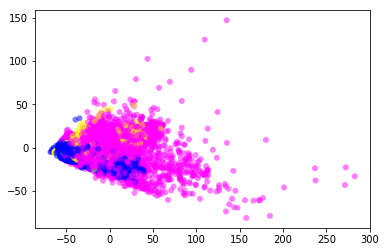

In [38]:
#component = pca.transform(part_var)
component = pca.transform(np_clinic_1)

#component2 = pca.transform(ampt_time_1)
plt.scatter(component[:,0], component[:,1],c=colours_lab_d, edgecolor='', alpha=0.5)
#plt.scatter(dtw_clinic_1[:,0], dtw_clinic_1[:,1],c=colours_lab, edgecolor='', alpha=0.5)

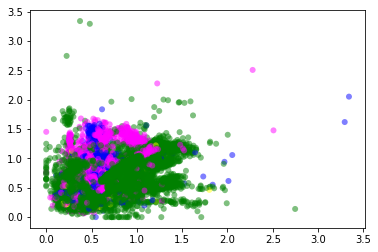

In [81]:
plt.scatter(component[:,98], component[:,99],c=colours_lab_d, edgecolor='', alpha=0.5)

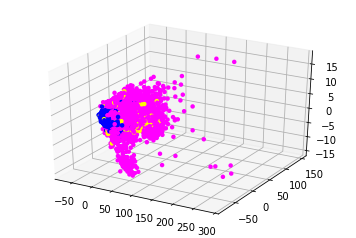

In [39]:

b2 = colours_lab_d

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
line = ax.scatter(component[:,0], component[:,1] ,component[:,2] , c=b2, edgecolors='none', depthshade=0)
#cb = plt.colorbar(line)

def forceUpdate(event):
    global line
    line.changed()

fig.canvas.mpl_connect('draw_event', forceUpdate)
plt.show()

In [ ]:
starts = 26280
ends = 29571
mit100_var = np_variables_1[starts:ends]
mit100_class = np_class_ID_1[starts:ends,]
mit100_var_beat = np_amp_1[starts:ends,]
mit100_var_rr = np_variables_1[starts:ends,99:104]




In [17]:
component = pca.transform(np_clinic_1)
#component2 = pca.transform(np_variables_2)

#component2 = pca.transform(ampt_time_1)
plt.scatter(component[:,0], component[:,1],c=colours_lab, edgecolor='', alpha=0.5)

NameError: name 'pca' is not defined

In [ ]:


X_embedded = TSNE(n_components=2).fit_transform(np_clinic_all)
X_embedded.shape


In [ ]:
plt.scatter(X_embedded[:,0], X_embedded[:,1],c=colours_lab, edgecolor='', alpha=0.5)


In [ ]:
b2 = colours_lab

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
line = ax.scatter(X_embedded[:,0], X_embedded[:,1] ,X_embedded[:,2] , c=b2, edgecolors='none', depthshade=0)
#cb = plt.colorbar(line)

def forceUpdate(event):
    global line
    line.changed()

fig.canvas.mpl_connect('draw_event', forceUpdate)

plt.show()

In [291]:
len(np_clinic_all)

92215

In [167]:
len(X_test)

15528

In [18]:
X_train, X_test, y_train, y_test = train_test_split(dtw_clinic_1,patients_ls_1, test_size=0.33, random_state=42)

In [34]:
X_train = np_non_var_1
X_test = np_non_var_2
y_train = np_class_ID_1
y_test = np_class_ID_2

In [25]:
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [26]:
y_pred = svclassifier.predict(X_test)  



In [27]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

[[1772  146  132]
 [ 122 2901  197]
 [   8   22  358]]
              precision    recall  f1-score   support

           1       0.93      0.86      0.90      2050
           2       0.95      0.90      0.92      3220
           3       0.52      0.92      0.67       388

    accuracy                           0.89      5658
   macro avg       0.80      0.90      0.83      5658
weighted avg       0.91      0.89      0.90      5658



In [ ]:
np_class_ID_2

In [28]:
from sklearn.ensemble import RandomForestClassifier



In [29]:
X_train = np_clinic_1
X_test = np_clinic_2
y_train = np_class_ID_1
y_test = np_class_ID_2

In [30]:
clf = RandomForestClassifier(n_estimators=10000, max_depth=5, random_state=0)

In [31]:
clf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [37]:
y_pred = clf.predict(X_test)

In [18]:
label_order=['0','1','2','3']

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

NameError: name 'confusion_matrix' is not defined

In [ ]:
print(metric.get_class_metrics(y_pred,y_test))
print(metric.get_class_metrics(y_pred,y_test))


In [33]:
features_im = clf.feature_importances_

In [34]:
features_im

array([4.00836182e-02, 2.58120141e-03, 5.43580782e-03, 4.91755260e-03,
       4.58327058e-03, 3.86005368e-03, 3.85979912e-03, 3.91773316e-03,
       3.67848002e-03, 3.62697565e-03, 3.93841916e-03, 4.28218048e-03,
       2.69506219e-03, 2.58398761e-02, 5.20526846e-04, 1.15197367e-03,
       1.97364891e-04, 1.73835322e-04, 1.82170423e-04, 1.99412932e-04,
       2.23587317e-04, 2.55975375e-04, 2.56452922e-04, 1.75751548e-04,
       1.16525536e-04, 2.73006731e-04, 1.25130671e-03, 4.91836412e-05,
       3.40352260e-03, 1.38606716e-03, 1.82136701e-03, 2.07043093e-03,
       1.98688320e-03, 2.51006044e-03, 2.31201788e-03, 2.24220389e-03,
       1.83646168e-03, 2.36780919e-03, 2.57692066e-03, 3.52428750e-03,
       1.83330459e-03, 2.89257243e-03, 9.05207446e-04, 3.27731415e-03,
       4.90375794e-03, 3.41157527e-03, 3.00632424e-03, 2.31312756e-03,
       1.66749995e-03, 1.38168993e-03, 1.56712750e-03, 1.40231791e-03,
       1.08602003e-03, 9.72322837e-04, 3.62000453e-03, 1.42525782e-03,
      

In [27]:
#features_important = features_im
#sort_list = features_im.sort()
features_im[102]

0.11338073964083639

In [25]:
result = np.where(features_im == max(features_im))



In [26]:
result

(array([102], dtype=int64),)

In [ ]:
features_im[31] # this is area of T wave

In [36]:
feat_labels = ["R_duration", "R_height", "R_amp0", "R_amp1","R_amp2","R_amp3", "R_amp4", "R_amp5", "R_amp6", "R_amp7", "R_amp8", "R_amp9", "R_prominence","R_areas","Q_duration", "Q_height", "Q_amp0", "Q_amp1","Q_amp2","Q_amp3", "Q_amp4", "Q_amp5", "Q_amp6", "Q_amp7", "Q_amp8", "Q_amp9", "Q_prominence","Q_areas", "S_duration", "S_height", "S_amp0", "S_amp1","S_amp2","S_amp3", "S_amp4", "S_amp5", "S_amp6", "S_amp7", "S_amp8", "S_amp9", "S_prominence","S_areas", "P_duration", "P_height", "P_amp0", "P_amp1","P_amp2","P_amp3", "P_amp4", "P_amp5", "P_amp6", "P_amp7", "P_amp8", "P_amp9", "P_prominence","P_areas", "P_neg_duration", "P_neg_height", "P_neg_amp0", "P_neg_amp1","P_neg_amp2","P_neg_amp3", "P_neg_amp4", "P_neg_amp5", "P_neg_amp6", "P_neg_amp7", "P_neg_amp8", "P_neg_amp9", "P_neg_prominence","P_neg_areas", "T_duration", "T_height", "T_amp0", "T_amp1","T_amp2","T_amp3", "T_amp4", "T_amp5", "T_amp6", "T_amp7", "T_amp8", "T_amp9", "T_prominence","T_areas","T_neg_durations","T_neg_height", "T_neg_amp0", "T_neg_amp1", "T_neg_amp2", "T_neg_amp3", "T_neg_amp4", "T_neg_amp5", "T_neg_amp6", "T_neg_amp7", "T_neg_amp8", "T_neg_amp9","T_neg_prominence","T_neg_areas", "rr_int_pre", "rr_int_post", "rr_int_10", "rr_int_50", "rr_int_all", "QRS_int", "QRS_int_10", "QRS_int_50", "PQ_int", "PQ_int_10", "PQ_int_50", "PR_int", "PR_int_10", "PR_int_50", "ST_int", "ST_int_10", "ST_int_50", "RT_int", "RT_int_10", "RT_int_50", "PT_int", "PT_int_10", "PT_int_50", "RP","TR","neg_RQ", "neg_PR", "neg_ST", "neg_RT", "neg_PT", "P_neg_T", "neg_P_neg_T"]
feat_labels_V = ["R_duration_V", "R_height_V", "R_amp0_V", "R_amp1_V","R_amp2_V","R_amp3_V", "R_amp4_V", "R_amp5_V", "R_amp6_V", "R_amp7_V", "R_amp8_V", "R_amp9_V", "R_prominence_V","R_areas_V","Q_duration_V", "Q_height_V", "Q_amp0_V", "Q_amp1_V","Q_amp2_V","Q_amp3_V", "Q_amp4_V", "Q_amp5_V", "Q_amp6_V", "Q_amp7_V", "Q_amp8_V", "Q_amp9_V", "Q_prominence_V","Q_areas_V", "S_duration_V", "S_height_V", "S_amp0_V", "S_amp1_V","S_amp2_V","S_amp3_V", "S_amp4_V", "S_amp5_V", "S_amp6_V", "S_amp7_V", "S_amp8_V", "S_amp9_V", "S_prominence_V","S_areas_V", "P_duration_V", "P_height_V", "P_amp0_V", "P_amp1_V","P_amp2_V","P_amp3_V", "P_amp4_V", "P_amp5_V", "P_amp6_V", "P_amp7_V", "P_amp8_V", "P_amp9_V", "P_prominence_V","P_areas_V", "P_neg_duration_V", "P_neg_height_V", "P_neg_amp0_V", "P_neg_amp1_V","P_neg_amp2_V","P_neg_amp3_V", "P_neg_amp4_V", "P_neg_amp5_V", "P_neg_amp6_V", "P_neg_amp7_V", "P_neg_amp8_V", "P_neg_amp9_V", "P_neg_prominence_V","P_neg_areas_V", "T_duration_V", "T_height_V", "T_amp0_V", "T_amp1_V","T_amp2_V","T_amp3_V", "T_amp4_V", "T_amp5_V", "T_amp6_V", "T_amp7_V", "T_amp8_V", "T_amp9_V", "T_prominence_V","T_areas_V","T_neg_durations_V","T_neg_height_V", "T_neg_amp0_V", "T_neg_amp1_V", "T_neg_amp2_V", "T_neg_amp3_V", "T_neg_amp4_V", "T_neg_amp5_V", "T_neg_amp6_V", "T_neg_amp7_V", "T_neg_amp8_V", "T_neg_amp9_V","T_neg_prominence_V","T_neg_areas_V", "rr_int_pre_V", "rr_int_post_V", "rr_int_10_V", "rr_int_50_V", "rr_int_all_V", "QRS_int_V", "QRS_int_10_V", "QRS_int_50_V", "PQ_int_V", "PQ_int_10_V", "PQ_int_50_V", "PR_int_V", "PR_int_10_V", "PR_int_50_V", "ST_int_V", "ST_int_10_V", "ST_int_50_V", "RT_int_V", "RT_int_10_V", "RT_int_50_V", "PT_int_V", "PT_int_10_V", "PT_int_50_V", "RP_V","TR_V","neg_RQ_V", "neg_PR_V", "neg_ST_V", "neg_RT_V", "neg_PT_V", "P_neg_T_V", "neg_P_neg_T_V"]
feat_labels_dtw = ["dtw1","dtw2"]
f_M = np.asarray(feat_labels)
f_V = np.asarray(feat_labels_V)
f_d = np.asarray(feat_labels_dtw)
features_clinic = np.hstack((f_M,f_V, f_d ))
 
for feature in zip(features_clinic, clf.feature_importances_):
    
    print(feature)

('R_duration', 0.04008361817856368)
('R_height', 0.0025812014065269436)
('R_amp0', 0.005435807818873162)
('R_amp1', 0.00491755260289464)
('R_amp2', 0.004583270579004016)
('R_amp3', 0.0038600536753801173)
('R_amp4', 0.0038597991232403673)
('R_amp5', 0.003917733157345261)
('R_amp6', 0.0036784800221366836)
('R_amp7', 0.0036269756511085206)
('R_amp8', 0.003938419158635661)
('R_amp9', 0.0042821804777789085)
('R_prominence', 0.0026950621867519934)
('R_areas', 0.0258398760886883)
('Q_duration', 0.0005205268457693159)
('Q_height', 0.0011519736675876923)
('Q_amp0', 0.00019736489139899564)
('Q_amp1', 0.00017383532227491704)
('Q_amp2', 0.00018217042331587178)
('Q_amp3', 0.00019941293162167254)
('Q_amp4', 0.00022358731709577273)
('Q_amp5', 0.00025597537531547187)
('Q_amp6', 0.00025645292201155375)
('Q_amp7', 0.00017575154813531354)
('Q_amp8', 0.00011652553590955453)
('Q_amp9', 0.00027300673100263387)
('Q_prominence', 0.0012513067096804017)
('Q_areas', 4.918364117754464e-05)
('S_duration', 0.003403

In [ ]:
max(clf.feature_importances_)

In [28]:

feat_labels = ["R_duration", "R_height", "R_amp0", "R_amp1","R_amp2","R_amp3", "R_amp4", "R_amp5", "R_amp6", "R_amp7", "R_amp8", "R_amp9", "R_prominence","R_areas","Q_duration", "Q_height", "Q_amp0", "Q_amp1","Q_amp2","Q_amp3", "Q_amp4", "Q_amp5", "Q_amp6", "Q_amp7", "Q_amp8", "Q_amp9", "Q_prominence","Q_areas", "S_duration", "S_height", "S_amp0", "S_amp1","S_amp2","S_amp3", "S_amp4", "S_amp5", "S_amp6", "S_amp7", "S_amp8", "S_amp9", "S_prominence","S_areas", "P_duration", "P_height", "P_amp0", "P_amp1","P_amp2","P_amp3", "P_amp4", "P_amp5", "P_amp6", "P_amp7", "P_amp8", "P_amp9", "P_prominence","P_areas", "P_neg_duration", "P_neg_height", "P_neg_amp0", "P_neg_amp1","P_neg_amp2","P_neg_amp3", "P_neg_amp4", "P_neg_amp5", "P_neg_amp6", "P_neg_amp7", "P_neg_amp8", "P_neg_amp9", "P_neg_prominence","P_neg_areas", "T_duration", "T_height", "T_amp0", "T_amp1","T_amp2","T_amp3", "T_amp4", "T_amp5", "T_amp6", "T_amp7", "T_amp8", "T_amp9", "T_prominence","T_areas","T_neg_durations","T_neg_height", "T_neg_amp0", "T_neg_amp1", "T_neg_amp2", "T_neg_amp3", "T_neg_amp4", "T_neg_amp5", "T_neg_amp6", "T_neg_amp7", "T_neg_amp8", "T_neg_amp9","T_neg_prominence","T_neg_areas", "rr_int_pre", "rr_int_post", "rr_int_10", "rr_int_50", "rr_int_all", "QRS_int", "QRS_int_10", "QRS_int_50", "PQ_int", "PQ_int_10", "PQ_int_50", "PR_int", "PR_int_10", "PR_int_50", "ST_int", "ST_int_10", "ST_int_50", "RT_int", "RT_int_10", "RT_int_50", "PT_int", "PT_int_10", "PT_int_50", "RP","TR","neg_RQ", "neg_PR", "neg_ST", "neg_RT", "neg_PT", "P_neg_T", "neg_P_neg_T", "class_beat", "class_ID"]

index = range(0,len(feat_labels))

for features in zip(feat_labels, index):
    print(features)

('R_duration', 0)
('R_height', 1)
('R_amp0', 2)
('R_amp1', 3)
('R_amp2', 4)
('R_amp3', 5)
('R_amp4', 6)
('R_amp5', 7)
('R_amp6', 8)
('R_amp7', 9)
('R_amp8', 10)
('R_amp9', 11)
('R_prominence', 12)
('R_areas', 13)
('Q_duration', 14)
('Q_height', 15)
('Q_amp0', 16)
('Q_amp1', 17)
('Q_amp2', 18)
('Q_amp3', 19)
('Q_amp4', 20)
('Q_amp5', 21)
('Q_amp6', 22)
('Q_amp7', 23)
('Q_amp8', 24)
('Q_amp9', 25)
('Q_prominence', 26)
('Q_areas', 27)
('S_duration', 28)
('S_height', 29)
('S_amp0', 30)
('S_amp1', 31)
('S_amp2', 32)
('S_amp3', 33)
('S_amp4', 34)
('S_amp5', 35)
('S_amp6', 36)
('S_amp7', 37)
('S_amp8', 38)
('S_amp9', 39)
('S_prominence', 40)
('S_areas', 41)
('P_duration', 42)
('P_height', 43)
('P_amp0', 44)
('P_amp1', 45)
('P_amp2', 46)
('P_amp3', 47)
('P_amp4', 48)
('P_amp5', 49)
('P_amp6', 50)
('P_amp7', 51)
('P_amp8', 52)
('P_amp9', 53)
('P_prominence', 54)
('P_areas', 55)
('P_neg_duration', 56)
('P_neg_height', 57)
('P_neg_amp0', 58)
('P_neg_amp1', 59)
('P_neg_amp2', 60)
('P_neg_amp3', 61

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [31]:
clf = LinearDiscriminantAnalysis()

In [40]:
X_train = np_clinic_1
X_test = np_clinic_2
y_train = np_class_ID_1
y_test = np_class_ID_2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dtw_clinic_1,patients_ls_1, test_size=0.33, random_state=42)

In [41]:
clf.fit(X_train, y_train)  

C:\Users\nimch681\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [42]:
y_pred = clf.predict(X_test)

In [43]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

[[1324  667   59]
 [ 114 2923  183]
 [   9   22  357]]
              precision    recall  f1-score   support

           1       0.91      0.65      0.76      2050
           2       0.81      0.91      0.86      3220
           3       0.60      0.92      0.72       388

    accuracy                           0.81      5658
   macro avg       0.77      0.82      0.78      5658
weighted avg       0.83      0.81      0.81      5658



In [44]:
class_weights = {}
for c in range(1,4):
    class_weights.update({c:len(X_test) / float(np.count_nonzero(y_test == c))})

In [45]:
class_weights

{1: 2.76, 2: 1.7571428571428571, 3: 14.582474226804123}

In [20]:
pca = PCA(n_components=50)
pca.fit(X_train)

component = pca.transform(X_train)


pca.fit(X_test)
component_2 = pca.transform(X_test)


In [117]:
#ada=ADASYN(ratio='auto')
ada=RandomUnderSampler(ratio='not minority')


In [118]:
X_train = np_clinic_1
X_test = np_clinic_2
y_train = np_class_ID_1
y_test = np_class_ID_2


X_train, y_train= ada.fit_sample(X_train, y_train)
X_test, y_test = ada.fit_sample(X_test, y_test)


In [119]:
len(X_train)

182821

In [46]:
C_value = 10
use_probability = True
multi_mode = 'ovo'
svm_model = svm.SVC(C=C_value, kernel='linear', degree=3, gamma='auto', 
                    coef0=0.0, shrinking=True, probability=use_probability, tol=0.001, 
                    cache_size=200, class_weight=class_weights, verbose=False, 
                    max_iter=-1, decision_function_shape=multi_mode, random_state=None)

In [120]:
C_value = 10
use_probability = True
multi_mode = 'ovo'
svm_model = svm.SVC(C=C_value, kernel='linear', degree=3, gamma='auto', 
                    coef0=0.0, shrinking=True, probability=use_probability, tol=0.001, 
                    cache_size=200, verbose=False, max_iter=-1, decision_function_shape=multi_mode, random_state=None)

In [ ]:
start = time.time()
svm_model.fit(X_train, y_train)
end = time.time()
print(end-start)

In [115]:
start = time.time()
y_pred = svm_model.predict(X_test)
end = time.time()
print(end-start)

0.14510893821716309


In [116]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))    

[[261  16  19  92]
 [248 110  10  20]
 [  5  21 311  51]
 [ 19   3   9 357]]
              precision    recall  f1-score   support

           0       0.49      0.67      0.57       388
           1       0.73      0.28      0.41       388
           2       0.89      0.80      0.84       388
           3       0.69      0.92      0.79       388

    accuracy                           0.67      1552
   macro avg       0.70      0.67      0.65      1552
weighted avg       0.70      0.67      0.65      1552



In [41]:
metric.get_class_metrics(y_pred,y_test)

[[0.956459475090193, 0.7690263723123935],
 [0.2058139534883721, 0.24755244755244754],
 [0.541223891535361, 0.8582219639744335],
 [0.052569577381828894, 0.9107142857142857]]

In [44]:
get_metrics(y_pred,y_test)

[0.3223575783322391, 1.8528122565506142, 0.39278032123494633]

In [ ]:
[[0.956459475090193, 0.7690263723123935],
 [0.2058139534883721, 0.24755244755244754],
 [0.541223891535361, 0.8582219639744335],
 [0.052569577381828894, 0.9107142857142857]]

[[34730  1996  2240  6195]
 [ 1325   531   249    40]
 [  238    51  2954   199]
 [   18     2    15   357]]

[[ 1290    20    21   126     4]
 [   72 34947  1555   365  7082]
 [   35  1327   473   166    49]
 [   23   130   105  2779   183]
 [    2    16     2    10   358]]
              precision    recall  f1-score   support

          -1       0.91      0.88      0.89      1461
           0       0.96      0.79      0.87     44021
           1       0.22      0.23      0.22      2050
           2       0.81      0.86      0.83      3220
           3       0.05      0.92      0.09       388

    accuracy                           0.78     51140
   macro avg       0.59      0.74      0.58     51140
weighted avg       0.91      0.78      0.84     51140

In [43]:
def get_metrics(yhat, labels):
    """
    Creates metrics to assess the model's performance.
    yhat - the predicted labels
    labels - the known labels
    @returns - [kappa, j, jkappa]
    """
    
    conf_matrix =  metrics.confusion_matrix(yhat, labels)
    kappa = get_kappa(conf_matrix, len(labels))
    j = get_j_index(conf_matrix)
    jkappa = 0.5*kappa + 0.125*j
    return [kappa, j, jkappa]

def get_class_metrics(yhat, labels):
    confusion_matrix = metrics.confusion_matrix(yhat, labels)
    Sen = float(confusion_matrix[0,0])/float(sum(confusion_matrix[0,:]))
    Ses = float(confusion_matrix[1,1])/float(sum(confusion_matrix[1,:]))
    Sev = float(confusion_matrix[2,2])/float(sum(confusion_matrix[2,:]))
    Sef = float(confusion_matrix[3,3])/float(sum(confusion_matrix[3,:]))
    Pn = float(confusion_matrix[0,0])/float(sum(confusion_matrix[:,0]))
    Ps = float(confusion_matrix[1,1])/float(sum(confusion_matrix[:,1]))
    Pv = float(confusion_matrix[2,2])/float(sum(confusion_matrix[:,2]))
    Pf = float(confusion_matrix[3,3])/float(sum(confusion_matrix[:,3]))
    return [[Sen, Pn], [Ses, Ps], [Sev, Pv], [Sef, Pf]]

def get_kappa(confusion_matrix, n_samples):
    Po = 0.0
    Pe = 0.0
    for i in range(4):
        Po += confusion_matrix[i,i]
        Pe += sum(confusion_matrix[:,i])*sum(confusion_matrix[i,:])
    Po = Po/n_samples
    Pe = Pe/n_samples**2

    return (Po - Pe)/(1 - Pe)

def get_j_index(confusion_matrix):
    Ses = float(confusion_matrix[1,1])/float(sum(confusion_matrix[1,:]))
    Sev = float(confusion_matrix[2,2])/float(sum(confusion_matrix[2,:]))
    Ps = float(confusion_matrix[1,1])/float(sum(confusion_matrix[:,1]))
    Pv = float(confusion_matrix[2,2])/float(sum(confusion_matrix[:,2]))
    return Ses + Sev + Ps + Pv